# Objective:

###### Vehicle insurance fraud is a prevalent issue worldwide, leading to significant financial losses for insurance companies. Fraudsters often conspire to submit false or exaggerated claims, ranging from staged accidents and phantom passengers to inflated personal injury reports. The objective of this project is to leverage machine learning techniques to detect fraudulent claims efficiently. By analyzing historical claims data, the model aims to identify suspicious patterns and predict potential fraud. Power BI will be used for interactive visualization, enabling stakeholders to interpret the predictions and take preventive actions, thus reducing fraudulent activities and improving claim processing efficiency.

  
## Dataset Description:

'Month’  : Month when the claim was made.

'WeekOfMonth' : Week when the claim was made.

'DayOfWeek' : Day when the claim was made.

‘'Make': Make of the car

'AccidentArea', :  Area of the accident

‘'DayOfWeekClaimed' “ :  Day of the week when claim was made

'MonthClaimed' : Month when claim was made

'WeekOfMonthClaimed' : In which week of the month, claim was made

'Sex' : Sex of the claimer 

'MaritalStatus': Marital status of the claimer 

'Age' : age of the claimer

'Fault' :  Fault for which claim was made

'PolicyType' : Type of policy they hold  

'VehicleCategory' : Category of the vehicle

'VehiclePrice' : price of the vehicle

'FraudFound_P' : Fraud was found or not

'PolicyNumber' : Policy number of the claimer

'RepNumber' : Representative number

Deductible' : Deductible is the amount that a policy holder has to pay before the insurance company starts paying up.

'DriverRating' : Rating of the driver

'Days_Policy_Accident' :   Days since the accident

'Days_Policy_Claim' : days since the claim

'PastNumberOfClaims':  Number of claims made in the past.

'AgeOfVehicle' :  Age of the vehicle

'AgeOfPolicyHolder' : Age of the policy holder

'PoliceReportFiled':  Was police report filed or not

'WitnessPresent':  Was a witness present there or not

'AgentType' : type of the agent

'NumberOfSuppliments' : Number of supplements provided

'AddressChange_Claim' : Was address changed claim was made

'NumberOfCars' : Number of cars the claimer has 

'Year':  year of the policy

'BasePolicy' : name of base policy


# Table of Contents:

- **Step 1** | Import Libraries
- **Step 2** | Read Datasets
- **Step 3** | Dataset Overview
    - **Step 3.1** | Dataset Basic Information
    - **Step 3.2** | Dopping Irrelevant columns
    - **Step 3.3** | Numerical Columns Description
    - **Step 3.4** | Object Columns Description
- **Step 4** | Univariate Analysis
    - **Step 4.1** | Numerical Variables Univariate Analysis
    - **Step 4.2** | Categorical Variables Univariate Analysis
- **Step 5** | Bivariate Analysis
    - **Step 5.1** | Numerical Features vs Target
    - **Step 5.2** | Categorical Features vs Target
- **Step 6** | Data Preprocessing
    - **Step 6.1** | Handle Missing Values
    - **Step 6.2** | Handle Duplicate Values
    - **Step 6.3** | Treating Outliers
    - **Step 6.4** | Feature Grouping
    - **Step 6.5** | Encode Categorical Variables
    - **Step 6.6** | Handling Imbalanced Data
    - **Step 6.7** | Transforming Skewed Features
    - **Step 6.8** | Feature Selection
- **Step 7** | Logistic Regression Model Building
    - **Step 7.1** | LogisticReg Base Model Definition
    - **Step 7.2** | LogisticReg Hyperparameter Tuning
    - **Step 7.3** | LogisticReg Model Evaluation
    - **Step 7.4** | Feature Importance
- **Step 8** | Decision Tree Model Building
    - **Step 8.1** | DT Base Model Definition
    - **Step 8.2** | DT Hyperparameter Tuning
    - **Step 8.3** | DT Model Evaluation
    - **Step 8.4** | Feature Importance
- **Step 9** | Random Forest Model Building
    - **Step 9.1** | RF Model Definition
    - **Step 9.2** | RF Hyperparameter Tuning
    - **Step 9.3** | RF Model Evaluation
    - **Step 9.4** | Feature Importance
- **Step 10** | XGbOOST Model Building
    - **Step 9.1** | XGB Model Definition
    - **Step 9.2** | XGB Hyperparameter Tuning
    - **Step 9.3** | XGB Model Evaluation
    - **Step 9.4** | Feature Importance
- **Step 11** | Load the New Test Data
    - **Step 9.1** | Preprocess the Test Data
    - **Step 9.2** | Load the Trained Model
    - **Step 9.3** | Make Predictions
    - **Step 9.4** | Save the Predictions
- **Step 12** | Conclusion

# Step 1 | Import Libraries

In [1]:
#import pandas for data related work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
import xgboost as xgb
%matplotlib inline

# Step 2 | Read Datasets

In [2]:
#load the data
data= pd.read_csv(r"C:\Users\Menka\Downloads\train_test_fraud_oracle.csv")

# Step 3 | Dataset Overview

In [3]:
#lets look at the data's shape
data.shape

(12336, 33)

In [4]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [5]:
data

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Aug            2   Saturday  Pontiac        Urban        Wednesday   
1       Jun            3  Wednesday   Toyota        Urban          Tuesday   
2       Apr            1     Monday    Honda        Urban           Friday   
3       Aug            1  Wednesday    Honda        Urban           Friday   
4       Apr            1   Saturday     Saab        Urban        Wednesday   
...     ...          ...        ...      ...          ...              ...   
12331   Dec            4     Friday  Pontiac        Urban          Tuesday   
12332   Feb            3    Tuesday   Saturn        Urban           Monday   
12333   Jan            1  Wednesday    Mazda        Urban           Friday   
12334   Dec            1     Monday   Toyota        Rural          Tuesday   
12335   May            1     Sunday    Honda        Urban           Monday   

      MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  \
0              Sep                   2    Male       Married  ...   
1              Jul                   3  Female       Married  ...   
2              Apr                   2    Male       Married  ...   
3              Aug                   1    Male        Single  ...   
4              Apr                   2    Male       Married  ...   
...            ...                 ...     ...           ...  ...   
12331          Jan                   1    Male        Single  ...   
12332          Feb                   3    Male       Married  ...   
12333          Jan                   2    Male       Married  ...   
12334          May                   3    Male       Married  ...   
12335          May                   1    Male        Single  ...   

       AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled WitnessPresent  \
0       more than 7          41 to 50                No             No   
1           6 years          41 to 50                No             No   
2       more than 7          51 to 65                No             No   
3           6 years          26 to 30                No             No   
4           7 years          51 to 65                No             No   
...             ...               ...               ...            ...   
12331       5 years          26 to 30                No             No   
12332       7 years          36 to 40                No             No   
12333       7 years          36 to 40                No             No   
12334   more than 7          36 to 40                No             No   
12335           new          16 to 17                No             No   

      AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
0      External               3 to 5            no change     1 vehicle  1994   
1      External                 none            no change     1 vehicle  1995   
2      External                 none            no change     1 vehicle  1994   
3      External          more than 5            no change     1 vehicle  1994   
4      External          more than 5            no change     1 vehicle  1996   
...         ...                  ...                  ...           ...   ...   
12331  External                 none            no change     1 vehicle  1996   
12332  External               1 to 2            no change     1 vehicle  1996   
12333  External               1 to 2         4 to 8 years    2 vehicles  1996   
12334  External          more than 5       under 6 months    2 vehicles  1994   
12335  External                 none            no change     1 vehicle  1994   

       BasePolicy  
0       Collision  
1       Liability  
2       Collision  
3       Collision  
4      All Perils  
...           ...  
12331   Collision  
12332  All Perils  
12333   Collision  
12334  All Perils  
12335   Collision  

[12336 rows x 33 columns]

In [6]:
#Get basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12336 entries, 0 to 12335
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 12336 non-null  object
 1   WeekOfMonth           12336 non-null  int64 
 2   DayOfWeek             12336 non-null  object
 3   Make                  12336 non-null  object
 4   AccidentArea          12336 non-null  object
 5   DayOfWeekClaimed      12336 non-null  object
 6   MonthClaimed          12336 non-null  object
 7   WeekOfMonthClaimed    12336 non-null  int64 
 8   Sex                   12336 non-null  object
 9   MaritalStatus         12336 non-null  object
 10  Age                   12336 non-null  int64 
 11  Fault                 12336 non-null  object
 12  PolicyType            12336 non-null  object
 13  VehicleCategory       12336 non-null  object
 14  VehiclePrice          12336 non-null  object
 15  FraudFound_P          12336 non-null

# Inferences:

- **Total Entries**: The dataset consists of 12336 entries.
- **Columns**: The dataset contains 32 columns, which represent various attributes related to Vehicle fraud data.

# Data Types:

- A majority of the columns, 24 to be precise, are of the object data type (often representing strings or categorical data).
- 9 columns are of the int64 data type, representing integer values.
- There are no columns with float data type in this dataset.
- Missing Data: There are no missing values in this dataset. All columns have non-null counts for all entries.

In [7]:
#When we are describing the data, transpose helps as it brings the statistical terms above as columns.
data.describe().T

count         mean          std     min      25%  \
WeekOfMonth         12336.0     2.794828     1.292105     1.0     2.00   
WeekOfMonthClaimed  12336.0     2.691553     1.263480     1.0     2.00   
Age                 12336.0    39.845331    13.515638     0.0    30.00   
FraudFound_P        12336.0     0.058528     0.234748     0.0     0.00   
PolicyNumber        12336.0  7687.674611  4455.336345     1.0  3833.75   
RepNumber           12336.0     8.510538     4.610879     1.0     5.00   
Deductible          12336.0   407.660506    43.820471   300.0   400.00   
DriverRating        12336.0     2.487597     1.119243     1.0     1.00   
Year                12336.0  1994.861706     0.803220  1994.0  1994.00   

                       50%       75%      max  
WeekOfMonth            3.0      4.00      5.0  
WeekOfMonthClaimed     3.0      4.00      5.0  
Age                   38.0     49.00     80.0  
FraudFound_P           0.0      0.00      1.0  
PolicyNumber        7690.5  11547.25  15420.0  
RepNumber              9.0     12.00     16.0  
Deductible           400.0    400.00    700.0  
DriverRating           2.0      3.00      4.0  
Year                1995.0   1996.00   1996.0

# Inference :

The following summary statistics provide insights into various numerical fraud of vehicle:

- **Distribution of Claims by Week**:The average week of the month for claims (WeekOfMonth and WeekOfMonthClaimed) is approximately 2.79 and 2.69, respectively, suggesting that most claims are filed in the early to mid-month period. This could indicate patterns in consumer behavior, as individuals may be more likely to file claims after receiving monthly bills or after significant events in the beginning weeks of a month.
- **Age Distribution**:The average age of claimants is around 39.85 years with a standard deviation of 13.52, ranging from 0 to 80 years. This indicates a diverse age group, but with a significant concentration of middle-aged individuals (30-50 years). Understanding the age distribution may help in identifying risk profiles and tailoring policies for different age demographics.
- **Fraud Detection Insights**:The proportion of fraudulent claims (FraudFound_P) is quite low at about 5.85%, suggesting that most claims are legitimate. However, this low rate of fraud could also point towards a need for improved detection mechanisms, especially if fraud is concentrated within specific demographics or claim patterns.
- **Policy and Claim Analysis**:The average PolicyNumber is quite high (7687.67), indicating a large volume of unique policies. This diversity can be beneficial for predictive modeling as it may lead to insights based on policy types.
- **Deductible**:The deductible amount averages around 407.66, with a mode of 400, suggesting that many policies have standardized deductible amounts. Understanding how deductible values relate to fraud incidents could reveal strategic insights into fraud patterns.
- **Driver Ratings**:The average driver rating is around 2.49, with the majority of ratings being between 1 and 4. This suggests that driver behavior could play a role in both the frequency and nature of claims. Further investigation into the correlation between driver ratings and fraudulent claims may reveal important insights for risk assessment.
- **Temporal Analysis**:The year data shows that the average year of policy issuance is around 1994. This could indicate that many policies are older, which might influence the claims process and risk factors associated with aging policies. 



In [8]:
data.describe(include='object')

Month DayOfWeek     Make AccidentArea DayOfWeekClaimed MonthClaimed  \
count   12336     12336    12336        12336            12336        12336   
unique     12         7       19            2                8           13   
top       Jan    Monday  Pontiac        Urban           Monday          Jan   
freq     1124      2077     3071        11057             2975         1143   

          Sex MaritalStatus          Fault         PolicyType  ...  \
count   12336         12336          12336              12336  ...   
unique      2             4              2                  9  ...   
top      Male       Married  Policy Holder  Sedan - Collision  ...   
freq    10400          8484           8946               4495  ...   

       PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled  \
count               12336        12336             12336             12336   
unique                  4            8                 9                 2   
top                2 to 4      7 years          31 to 35                No   
freq                 4369         4681              4495             11994   

       WitnessPresent AgentType NumberOfSuppliments AddressChange_Claim  \
count           12336     12336               12336               12336   
unique              2         2                   4                   5   
top                No  External                none           no change   
freq            12268     12141                5636               11467   

       NumberOfCars BasePolicy  
count         12336      12336  
unique            5          3  
top       1 vehicle  Collision  
freq          11461       4798  

[4 rows x 24 columns]

# Inference :

The following summary statistics provide insights into various categorical attributes of frauds in vehicle:
## Temporal Trends:
- **Month and Day of Week**: The data shows that claims are most frequently filed in January (1124 claims) and on Mondays (2077 claims). This could suggest that accidents may occur more often after weekends or during the start of a new month, indicating patterns in driver behavior and claim filing.
## Vehicle and Claim Characteristics:
- **Make and Accident Area**: The most common make of vehicle involved in claims is Pontiac, with a significant majority of claims occurring in urban areas (11057 claims). This indicates that urban driving conditions might be riskier and could warrant further investigation into accident causes in such environments.
- **Policy Types**: The prevalent policy type is "Sedan - Collision" with 4495 occurrences, suggesting that collision-related incidents are the most common type of claims in the dataset. Understanding the relationship between policy types and fraud rates can enhance risk management strategies.
## Demographics:
- **Gender and Marital Status**: A significant majority of claimants are male (10400 claims) and married (8484 claims). Analyzing how these demographic factors correlate with fraud can provide insights into risk profiles and help tailor insurance offerings.
- **Age of Policy Holder**: The most common age group for policyholders is between 31 to 35 years (4495 claims). This could indicate a demographic that is more likely to file claims, possibly due to lifestyle factors associated with this age range.
## Claims History:
- **Past Number of Claims**: The data shows that the majority of claimants have between 2 to 4 past claims (4369 claims). This suggests a pattern where individuals with prior claims may be more likely to file again, potentially affecting their risk profile for future claims.
## Accident and Claim Processing:

- **Police Report and Witnesses**: A notable portion of claims did not have a police report filed (11994 claims) and lacked witnesses (12268 claims). This raises questions about the credibility of these claims and indicates that a lack of official documentation could correlate with higher instances of fraudulent claims.
## Agent and Policy Characteristics:

- **Agent Type**: Claims primarily involve external agents (5636 claims), which may influence the claims handling process and the way claims are processed or challenged. Understanding the impact of agent type on fraud detection can be beneficial for improving the claims process.
- **Address Change**: The feature "AddressChange_Claim" indicates no changes for most claims (11467 claims), which might suggest stability in claimants’ residence as a factor in assessing risk.

# Step 4 | Univariate Analysis

## Step 4.1 | Numerical Variables Univariate Analysis

In [9]:
num_features = data.describe().columns
df_num = data[num_features]

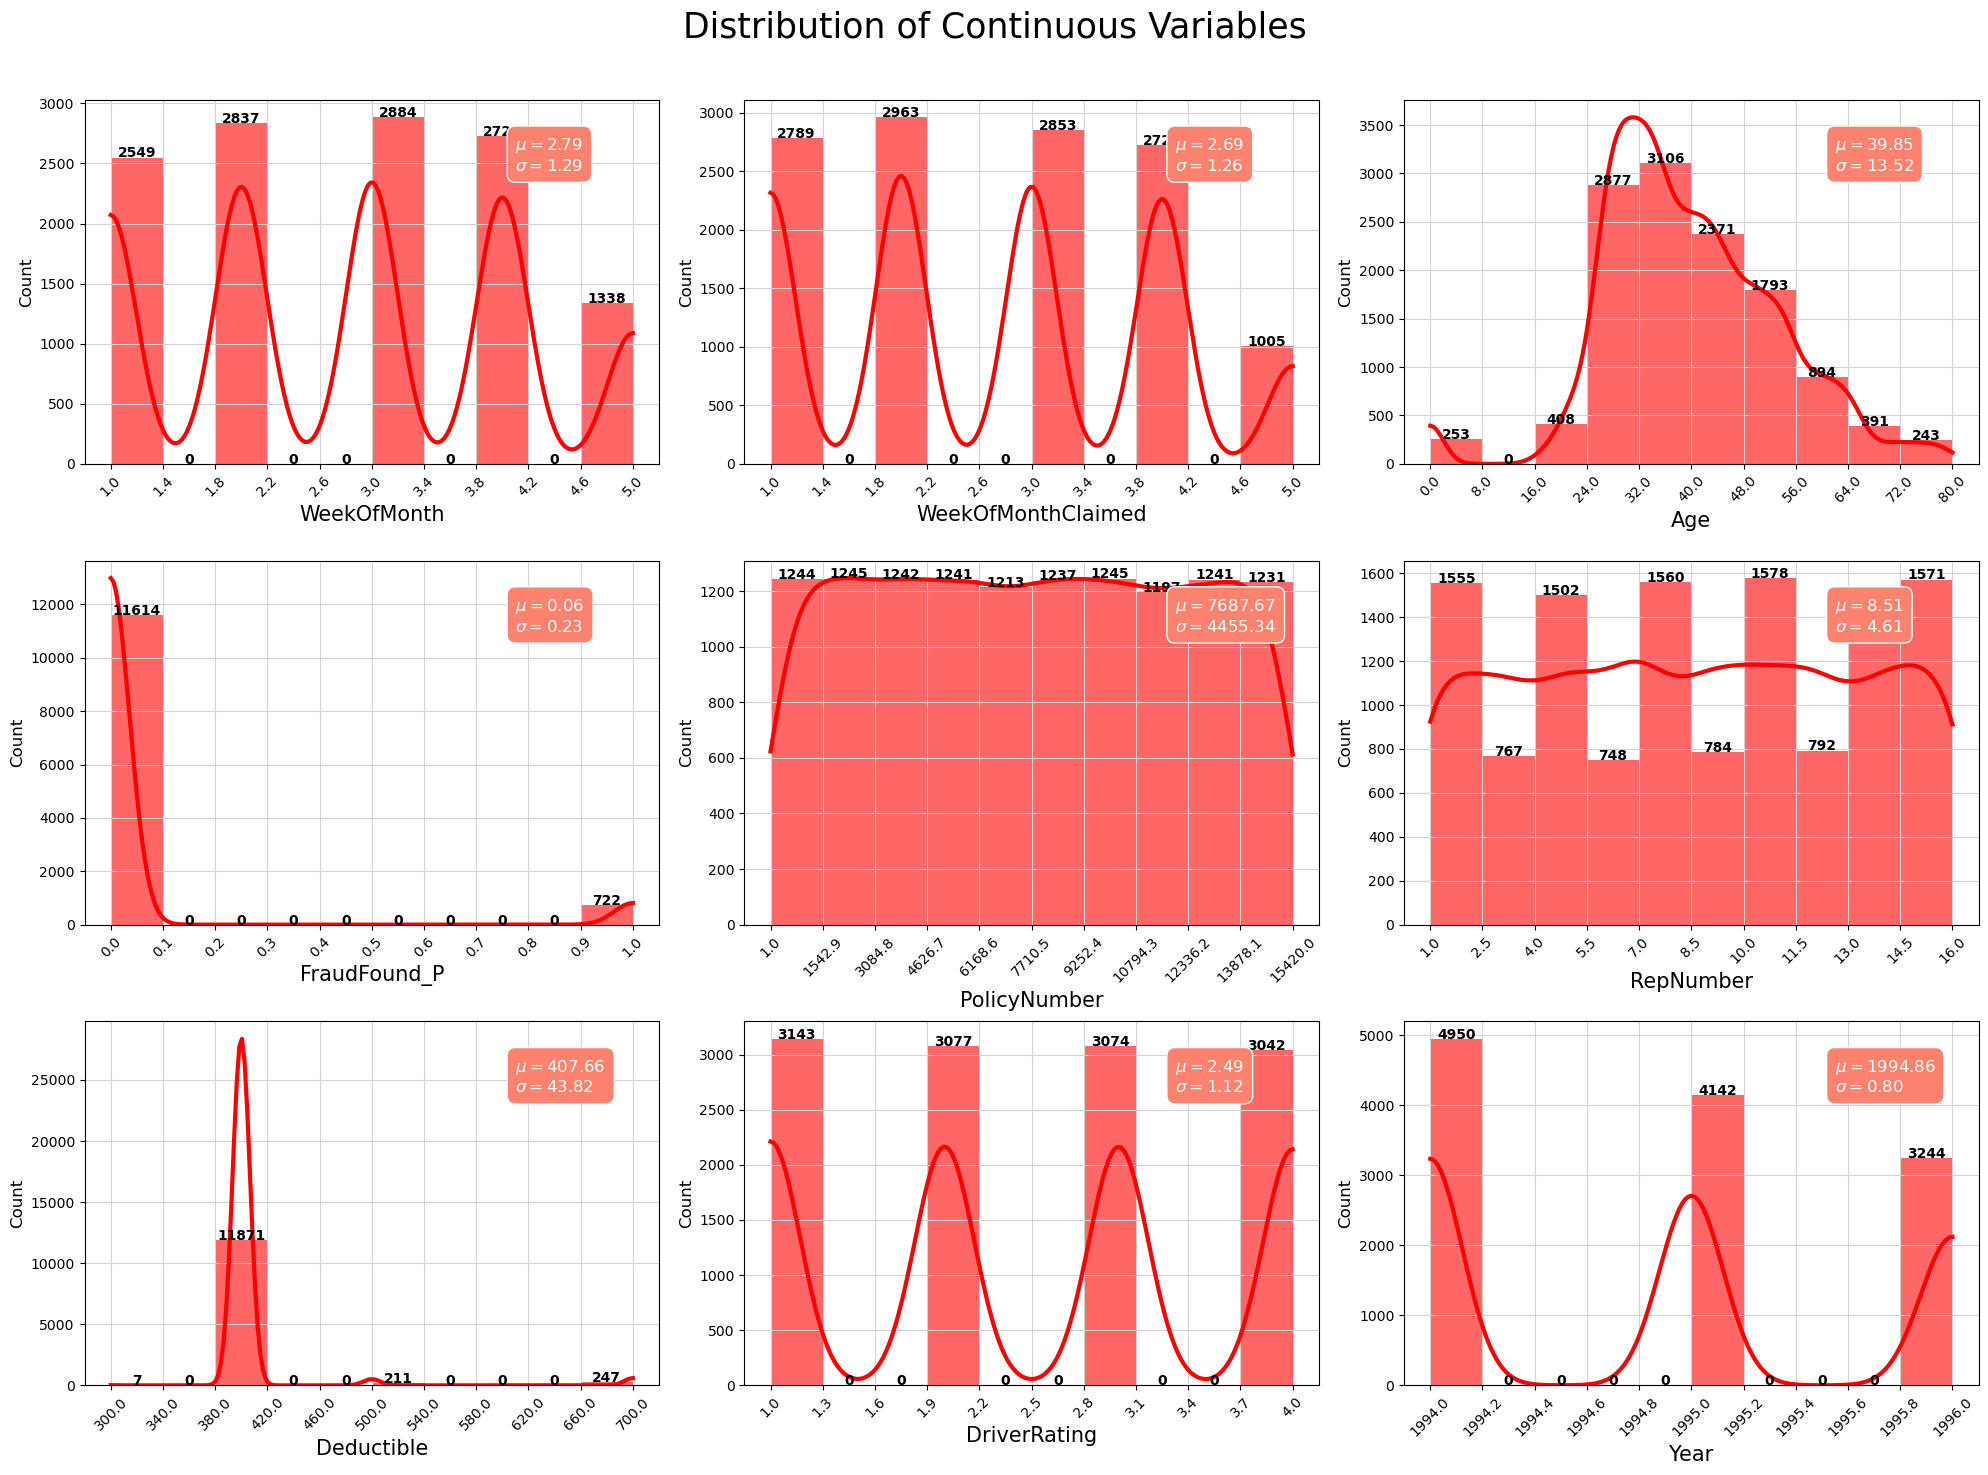

In [10]:
import math

# Determine number of rows needed
num_cols = len(df_num.columns)
num_rows = math.ceil(num_cols / 3)

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_num.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_num[col], 
                                     range=(np.floor(df_num[col].min()), np.ceil(df_num[col].max())))

    graph = sns.histplot(data=df_num, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Count', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join(( 
        r'$\mu=%.2f$' % df_num[col].mean(),
        r'$\sigma=%.2f$' % df_num[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

# Hide any unused axes
for i in range(num_cols, num_rows * 3):
    fig.delaxes(ax.flatten()[i])

plt.suptitle('Distribution of Continuous Variables', fontsize=25)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


This graph shows distribution plots of several continuous variables from the dataset. Each subplot represents the frequency (or count) of data points for a specific variable, giving an idea of how values are spread out. Let me break it down in simple terms:

1. WeekOfMonth (Top-left):
What it shows: How many cases fall into each week of the month (Week 1, 2, 3, 4, or 5).
Takeaway: There are spikes in weeks 1 and 4, meaning most cases happen during these weeks.
2. WeekOfMonthClaimed (Top-center):
What it shows: Similar to the previous plot, but this is for the week in which a claim was made.
Takeaway: Like WeekOfMonth, more claims tend to be made in weeks 1 and 4.
3. Age (Top-right):
What it shows: The ages of individuals in your dataset.
Takeaway: Most of the individuals are around 30-40 years old, with fewer younger or older people.
4. FraudFound_P (Middle-left):
What it shows: Whether fraud was found (0 = No fraud, 1 = Fraud).
Takeaway: Most cases did not involve fraud, but a small number did.
5. PolicyNumber (Middle-center):
What it shows: The count of cases for different policy numbers.
Takeaway: The data is quite evenly distributed across policy numbers, but there is a large amount of variation.
6. RepNumber (Middle-right):
What it shows: The number of claims handled by each representative.
Takeaway: There is a relatively even distribution across representatives, though a few handle significantly more cases.
7. Deductible (Bottom-left):
What it shows: The deductible amount (the portion of the claim paid by the insured person).
Takeaway: Most deductibles are around the 400 mark, with fewer cases having a higher deductible.
8. DriverRating (Bottom-center):
What it shows: A rating for drivers (possibly related to their risk).
Takeaway: Most drivers are rated either 1 or 3, with fewer in the other categories.
9. Year (Bottom-right):
What it shows: The year of the claim.
Takeaway: The data is focused on a few years, with more claims in some years than others.

General Observation: The distributions show us when most claims and fraud cases are happening. For example, fraud cases are rare (as seen in the FraudFound_P plot). Claims tend to be more common during specific weeks and for certain age groups (30-40 years old). The Deductible plot shows that most cases involve a deductible of around 400, which can help in analyzing the financial aspect of claims.

μ (Mean):

What it is: The mean is the average value of the data points in that variable.
How it's shown: In each subplot, the mean (μ) tells us where the center of the data is located.
Example: In the Age plot, the mean (μ = 39.85) shows that, on average, the individuals in the dataset are about 40 years old.
σ (Standard Deviation):

What it is: The standard deviation (σ) measures the spread of the data — how far the values are from the mean. A higher standard deviation means more spread out values, while a lower standard deviation means the values are closer to the mean.
How it's shown: In each subplot, σ represents how consistent or variable the data is around the mean.
Example: In the Deductible plot, the standard deviation is σ = 43.82, which indicates that the deductible values vary by about 44 units from the mean (407.66). This tells us that most deductibles are close to 407, but there is some spread.

Let’s break this down using two examples from the graph:
1. Age Plot:
Mean (μ = 39.85): This tells us that the average age of the individuals in the dataset is about 40 years.
Standard Deviation (σ = 13.52): The spread of ages is about 13.5 years, meaning that while the average is around 40, most people are between roughly 26 and 53 years old (one standard deviation above and below the mean).
2. FraudFound_P Plot:
Mean (μ = 0.06): This means that, on average, only about 6% of the cases involved fraud (since FraudFound_P is a binary variable where 0 means no fraud, and 1 means fraud).
Standard Deviation (σ = 0.23): The spread of fraud cases is relatively small because the majority of cases are clustered around 0 (no fraud), with very few reaching 1 (fraud detected).
Why This is Important:
Mean: Gives you a quick understanding of the central tendency — where most data points lie.
Standard Deviation: Tells you how variable or consistent the data is. A low standard deviation means the data points are tightly clustered around the mean, while a high standard deviation means there’s a lot of variation.

High Standard Deviation (e.g., in PolicyNumber) might mean that there is a lot of variety in policies, which can be worth exploring to understand why certain policies are more common than others.
Low Standard Deviation (e.g., in FraudFound_P) indicates that fraud is rare, and the cases are concentrated around no fraud (0). This can focus your fraud detection efforts.
The combination of these two metrics (mean and standard deviation) gives a quick snapshot of how each variable behaves in your data.

# 4.2 Categorical Variables Univariate Analysis

To examine the distribution of categorical features, we plot interactive pie charts for binary features and bar plots for others:

In [12]:
#This is one simple way of finding out all the object columns
objectList=data.select_dtypes(include=['object']).columns.tolist()
print(objectList)
#There will be one more way of filtering the object type columsns, learn more in this case study later!

['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


# 4.3 Low Cardinality Categorical Features

In [13]:
# Filter low cardinality features for the univariate analysis, excluding 'type' column
low_cardinality_fea = ['DayOfWeek','MonthClaimed','NumberOfSuppliments','DayOfWeekClaimed','Days_Policy_Claim','AddressChange_Claim','AgeOfVehicle','MaritalStatus','Days_Policy_Accident','PolicyType','VehiclePrice','NumberOfCars','VehicleCategory','BasePolicy','AgeOfPolicyHolder','PastNumberOfClaims','Month']
df_low_cardinality = data[low_cardinality_fea]

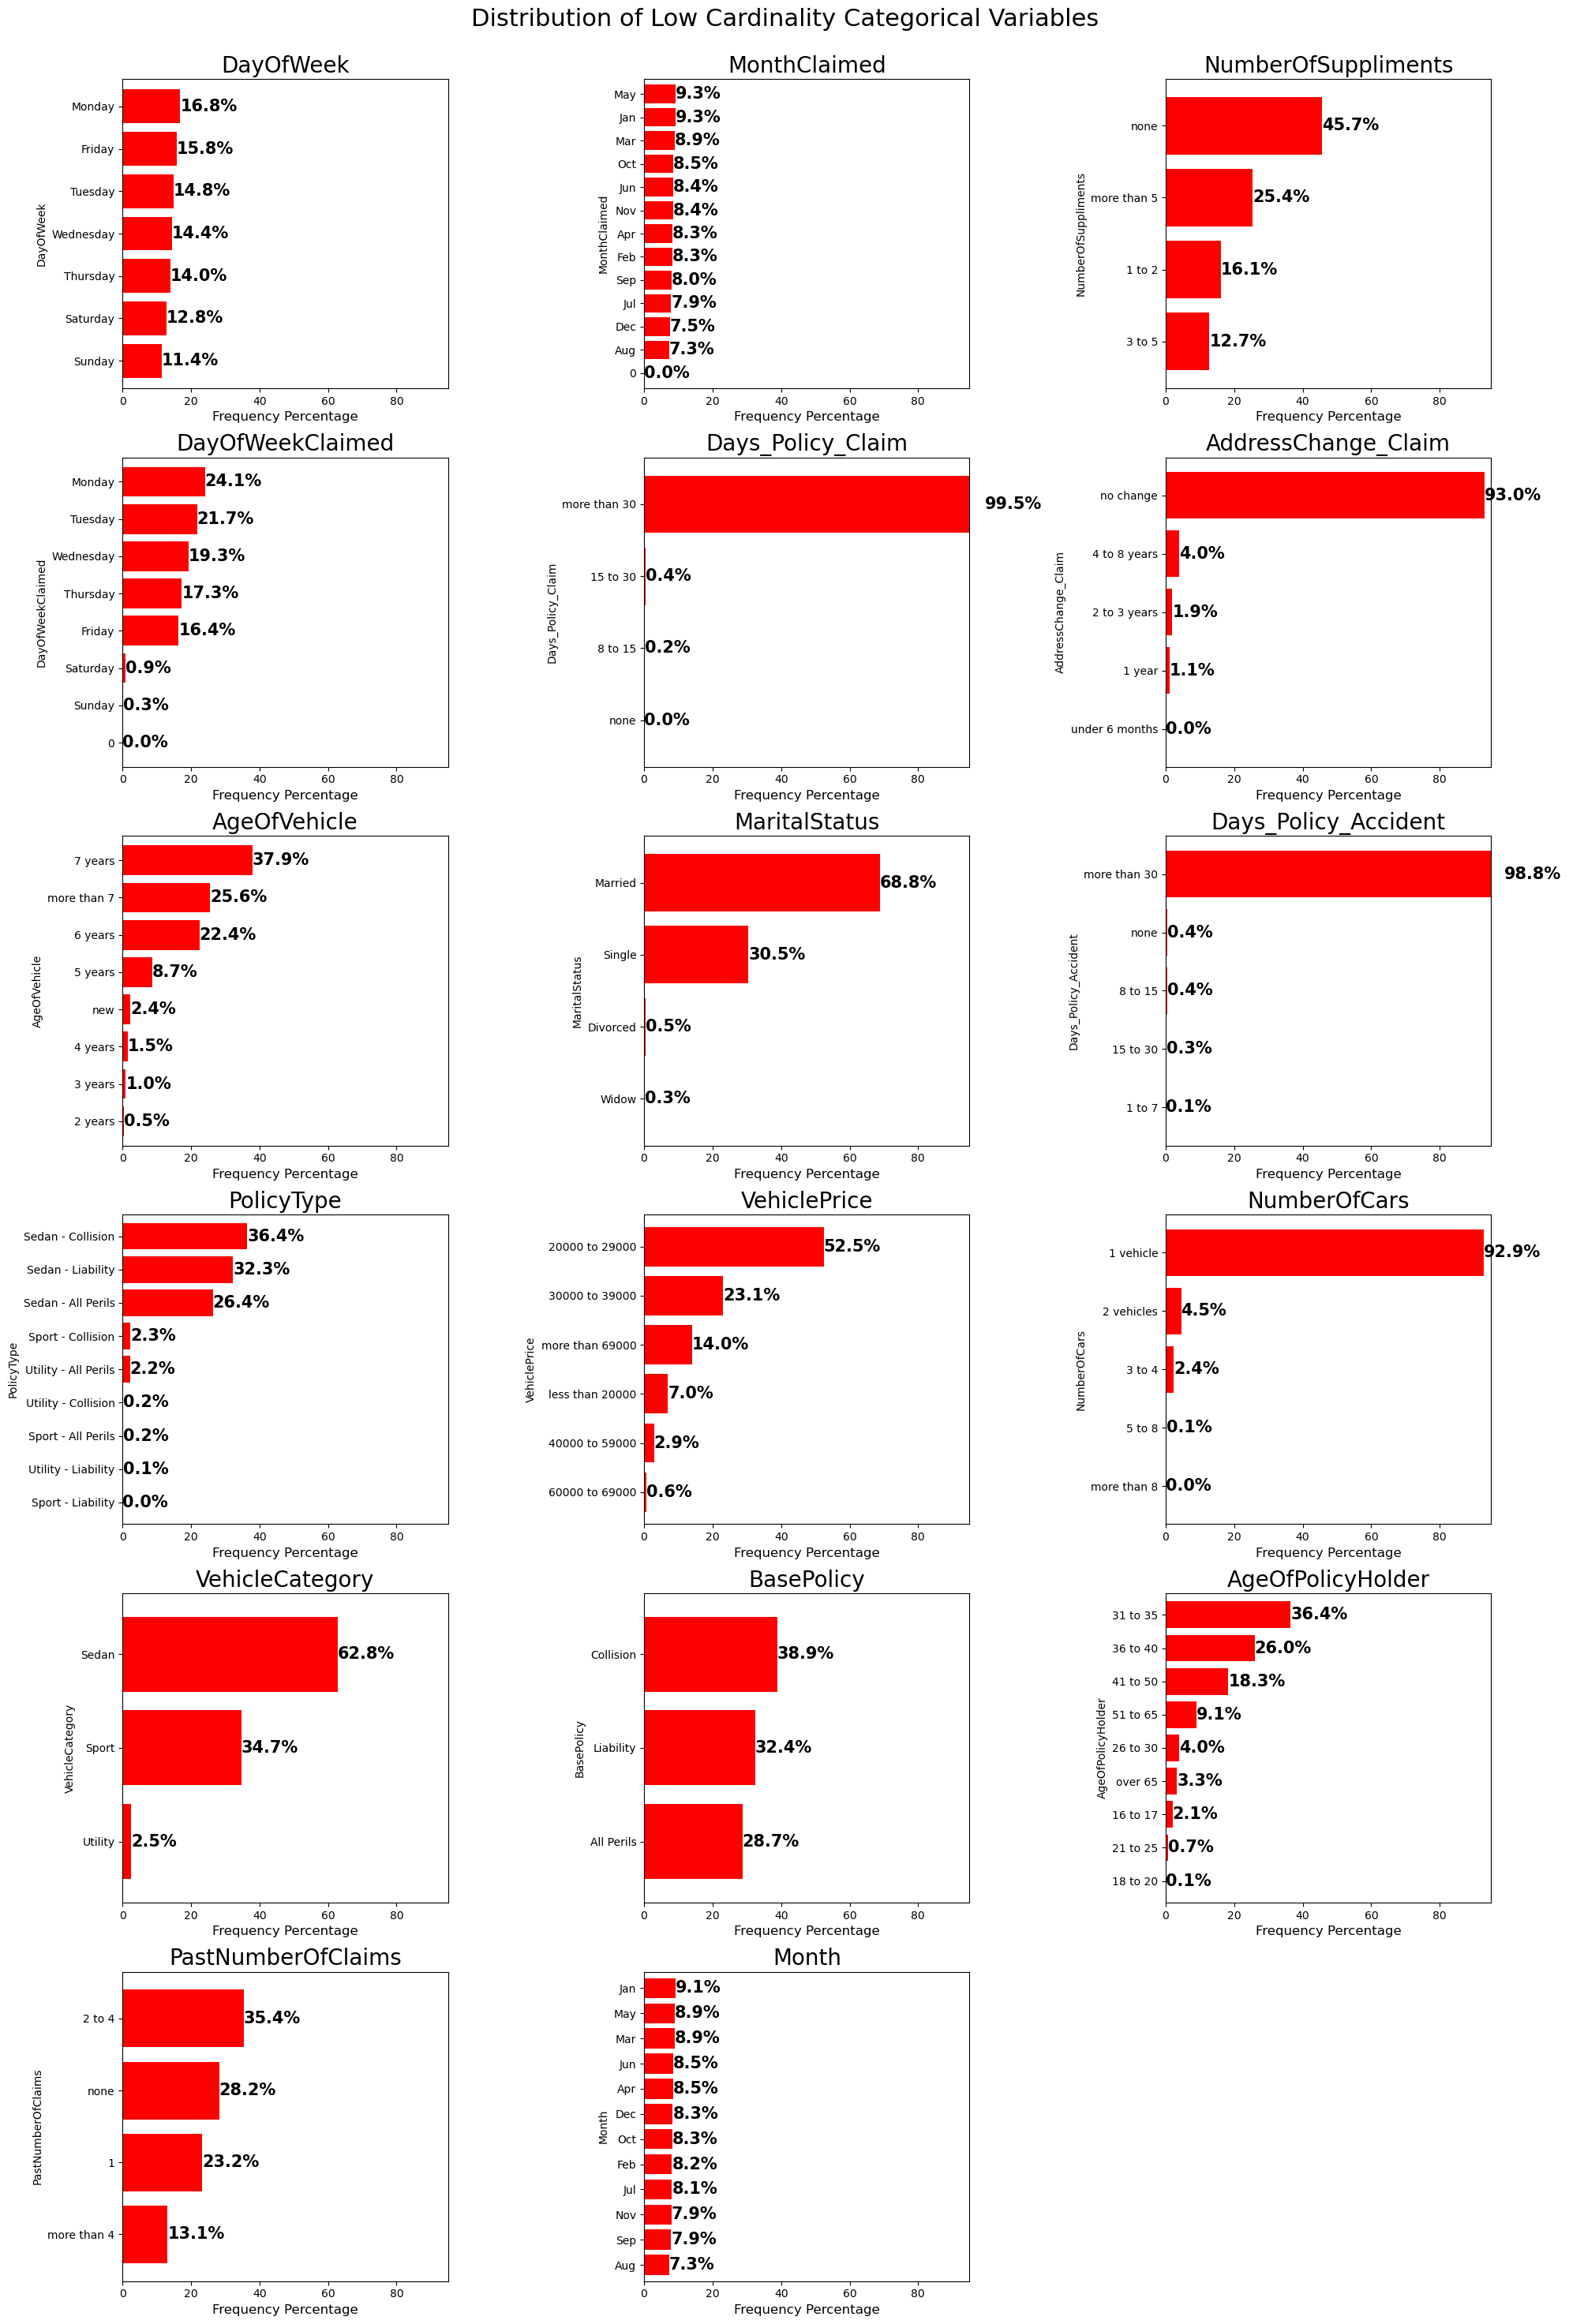

In [14]:


# Determine the number of rows needed
num_features = len(low_cardinality_fea)
num_rows = math.ceil(num_features / 3)

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Loop to plot bar charts for each categorical feature
for i, col in enumerate(low_cardinality_fea):
    row = i // 3
    col_idx = i % 3
    
    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values()
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[row, col_idx], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[row, col_idx].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[row, col_idx].set_xlim([0, 95])
    ax[row, col_idx].set_xlabel('Frequency Percentage', fontsize=12)
    ax[row, col_idx].set_title(f'{col}', fontsize=20)

# Hide any unused subplots
for i in range(num_features, num_rows * 3):
    fig.delaxes(ax.flatten()[i])

plt.suptitle('Distribution of Low Cardinality Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [15]:
categorical_columns = data.describe(include="object").columns
categorical_columns = list(categorical_columns)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from matplotlib import colors

# List of binary categorical columns
bin_categorical_columns = ['AccidentArea', 'Sex', 'Fault','AgentType','PoliceReportFiled','WitnessPresent']

# Create the subplots (adjust cols to match the number of features)
fig = make_subplots(rows=1, cols=len(bin_categorical_columns), specs=[[{'type':'domain'}]*len(bin_categorical_columns)], 
                    vertical_spacing=0.01, horizontal_spacing=0.01)

# Loop through all the features and add the pie chart to the subplot
for i, feature in enumerate(bin_categorical_columns):
    value_counts = data[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()

    # Define color map based on purple color
    cmap = colors.LinearSegmentedColormap.from_list("red", ["red", "white"])
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    # Create the pie chart
    pie_chart = go.Pie(
        labels=labels,
        values=values,
        hole=0.6,
        marker=dict(colors=color_list, line=dict(color='white', width=3)),
        textposition='inside',
        textinfo='percent+label',
        title=feature,  # Add title with the feature name
        title_font=dict(size=25, color='black', family='Calibri')
    )

    # Add the pie chart to the subplot
    fig.add_trace(pie_chart, row=1, col=i+1)

# Update the layout
fig.update_layout(showlegend=False, height=400, width=990, 
                   title={
                          'text':"Distribution of Binary Categorical columns",
                          'y':0.90,
                          'x':0.5,
                          'xanchor':'center',
                          'yanchor':'top',
                          'font': {'size':28, 'color':'black', 'family':'Calibri'}
                         })

# Show the plot
fig.show()


# 4.4 High Cardinality Categorical Features

In [18]:
#WE will focus on only TOP10 from each one

In [19]:
# Filter high cardinality features for the univariate analysis, excluding 'type' column
high_cardinality_fea = list((set(categorical_columns) - set(low_cardinality_fea)) - set(bin_categorical_columns))

# Filter the DataFrame for only high cardinality features
df_high_cardinality = data[high_cardinality_fea]


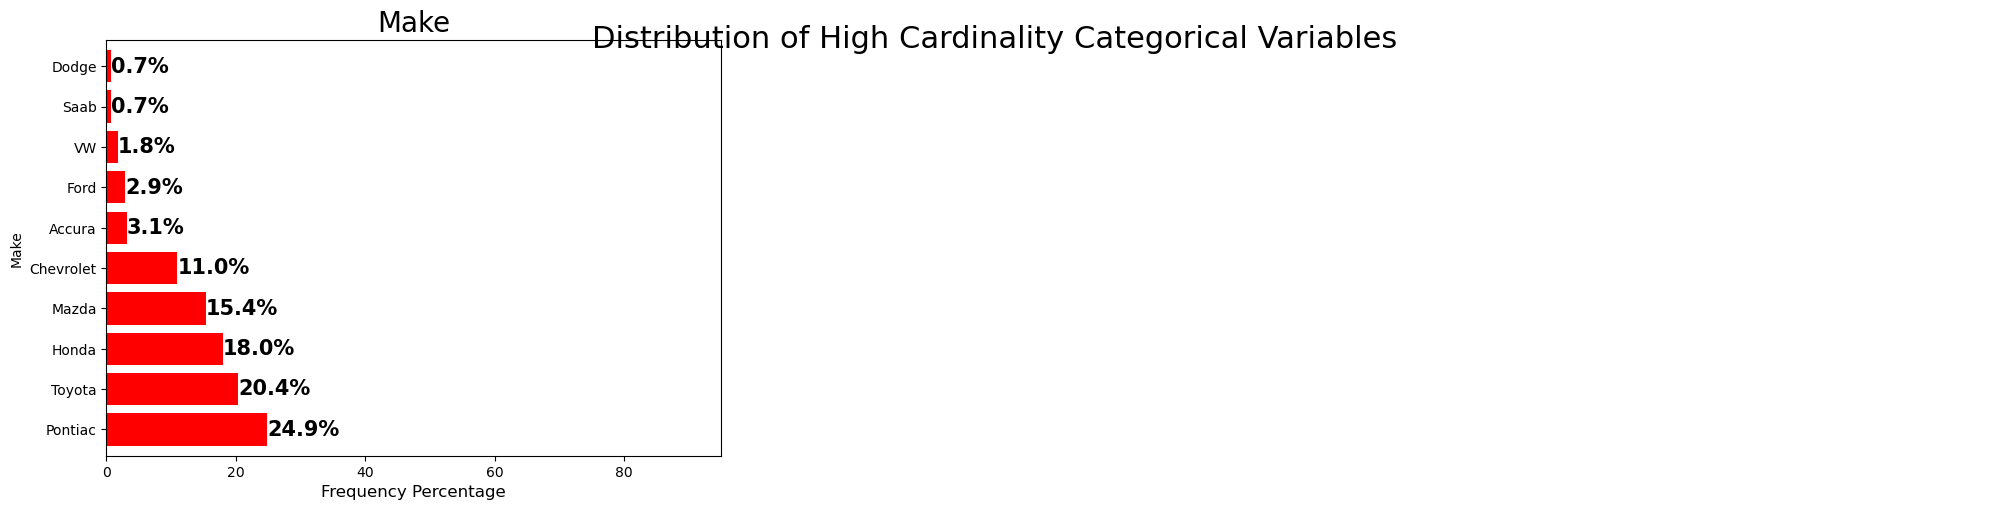

In [20]:
# Calculate the number of rows and columns dynamically based on the number of features
num_features = len(high_cardinality_fea)
ncols = 3  # Set a fixed number of columns
nrows = math.ceil(num_features / ncols)  # Dynamically calculate rows based on features

# Set up the subplot with dynamic row numbers
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))  # Adjust height based on rows

# Flatten ax to handle both 2D and 1D arrays (useful for dynamic plotting)
ax = ax.flatten()

# Loop to plot bar charts for each high cardinality categorical feature
for i, col in enumerate(high_cardinality_fea):
    # Calculate frequency percentages
    value_counts = data[col].value_counts(normalize=True).mul(100).sort_values(ascending=False).head(10)
    
    # Plot bar chart
    value_counts.plot(kind='barh', ax=ax[i], width=0.8, color='red')
    
    # Add frequency percentages to the bars
    for index, value in enumerate(value_counts):
        ax[i].text(value, index, str(round(value, 1)) + '%', fontsize=15, weight='bold', va='center')
    
    ax[i].set_xlim([0, 95])
    ax[i].set_xlabel('Frequency Percentage', fontsize=12)
    ax[i].set_title(f'{col}', fontsize=20)

# Hide any unused subplots if num_features < total subplots
for j in range(i + 1, len(ax)):
    ax[j].axis('off')

# Add a main title and adjust the layout
plt.suptitle('Distribution of High Cardinality Categorical Variables', fontsize=22)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# 5. Bivariate Analysis

# Numerical Features vs Target

In [21]:
data.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  12336.000000        12336.000000  12336.000000  12336.000000   
mean       2.794828            2.691553     39.845331      0.058528   
std        1.292105            1.263480     13.515638      0.234748   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     30.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     49.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  12336.000000  12336.000000  12336.000000  12336.000000  12336.000000  
mean    7687.674611      8.510538    407.660506      2.487597   1994.861706  
std     4455.336345      4.610879     43.820471      1.119243      0.803220  
min        1.000000      1.000000    300.000000      1.000000   1994.000000  
25%     3833.750000      5.000000    400.000000      1.000000   1994.000000  
50%     7690.500000      9.000000    400.000000      2.000000   1995.000000  
75%    11547.250000     12.000000    400.000000      3.000000   1996.000000  
max    15420.000000     16.000000    700.000000      4.000000   1996.000000

In this section, we attempt to find the mean and distribution of numerical features for VEHICLE who did fraud and those who did not:

# 5.1 Bivariate Analysis

In [23]:
#Numerical Features vs Target 

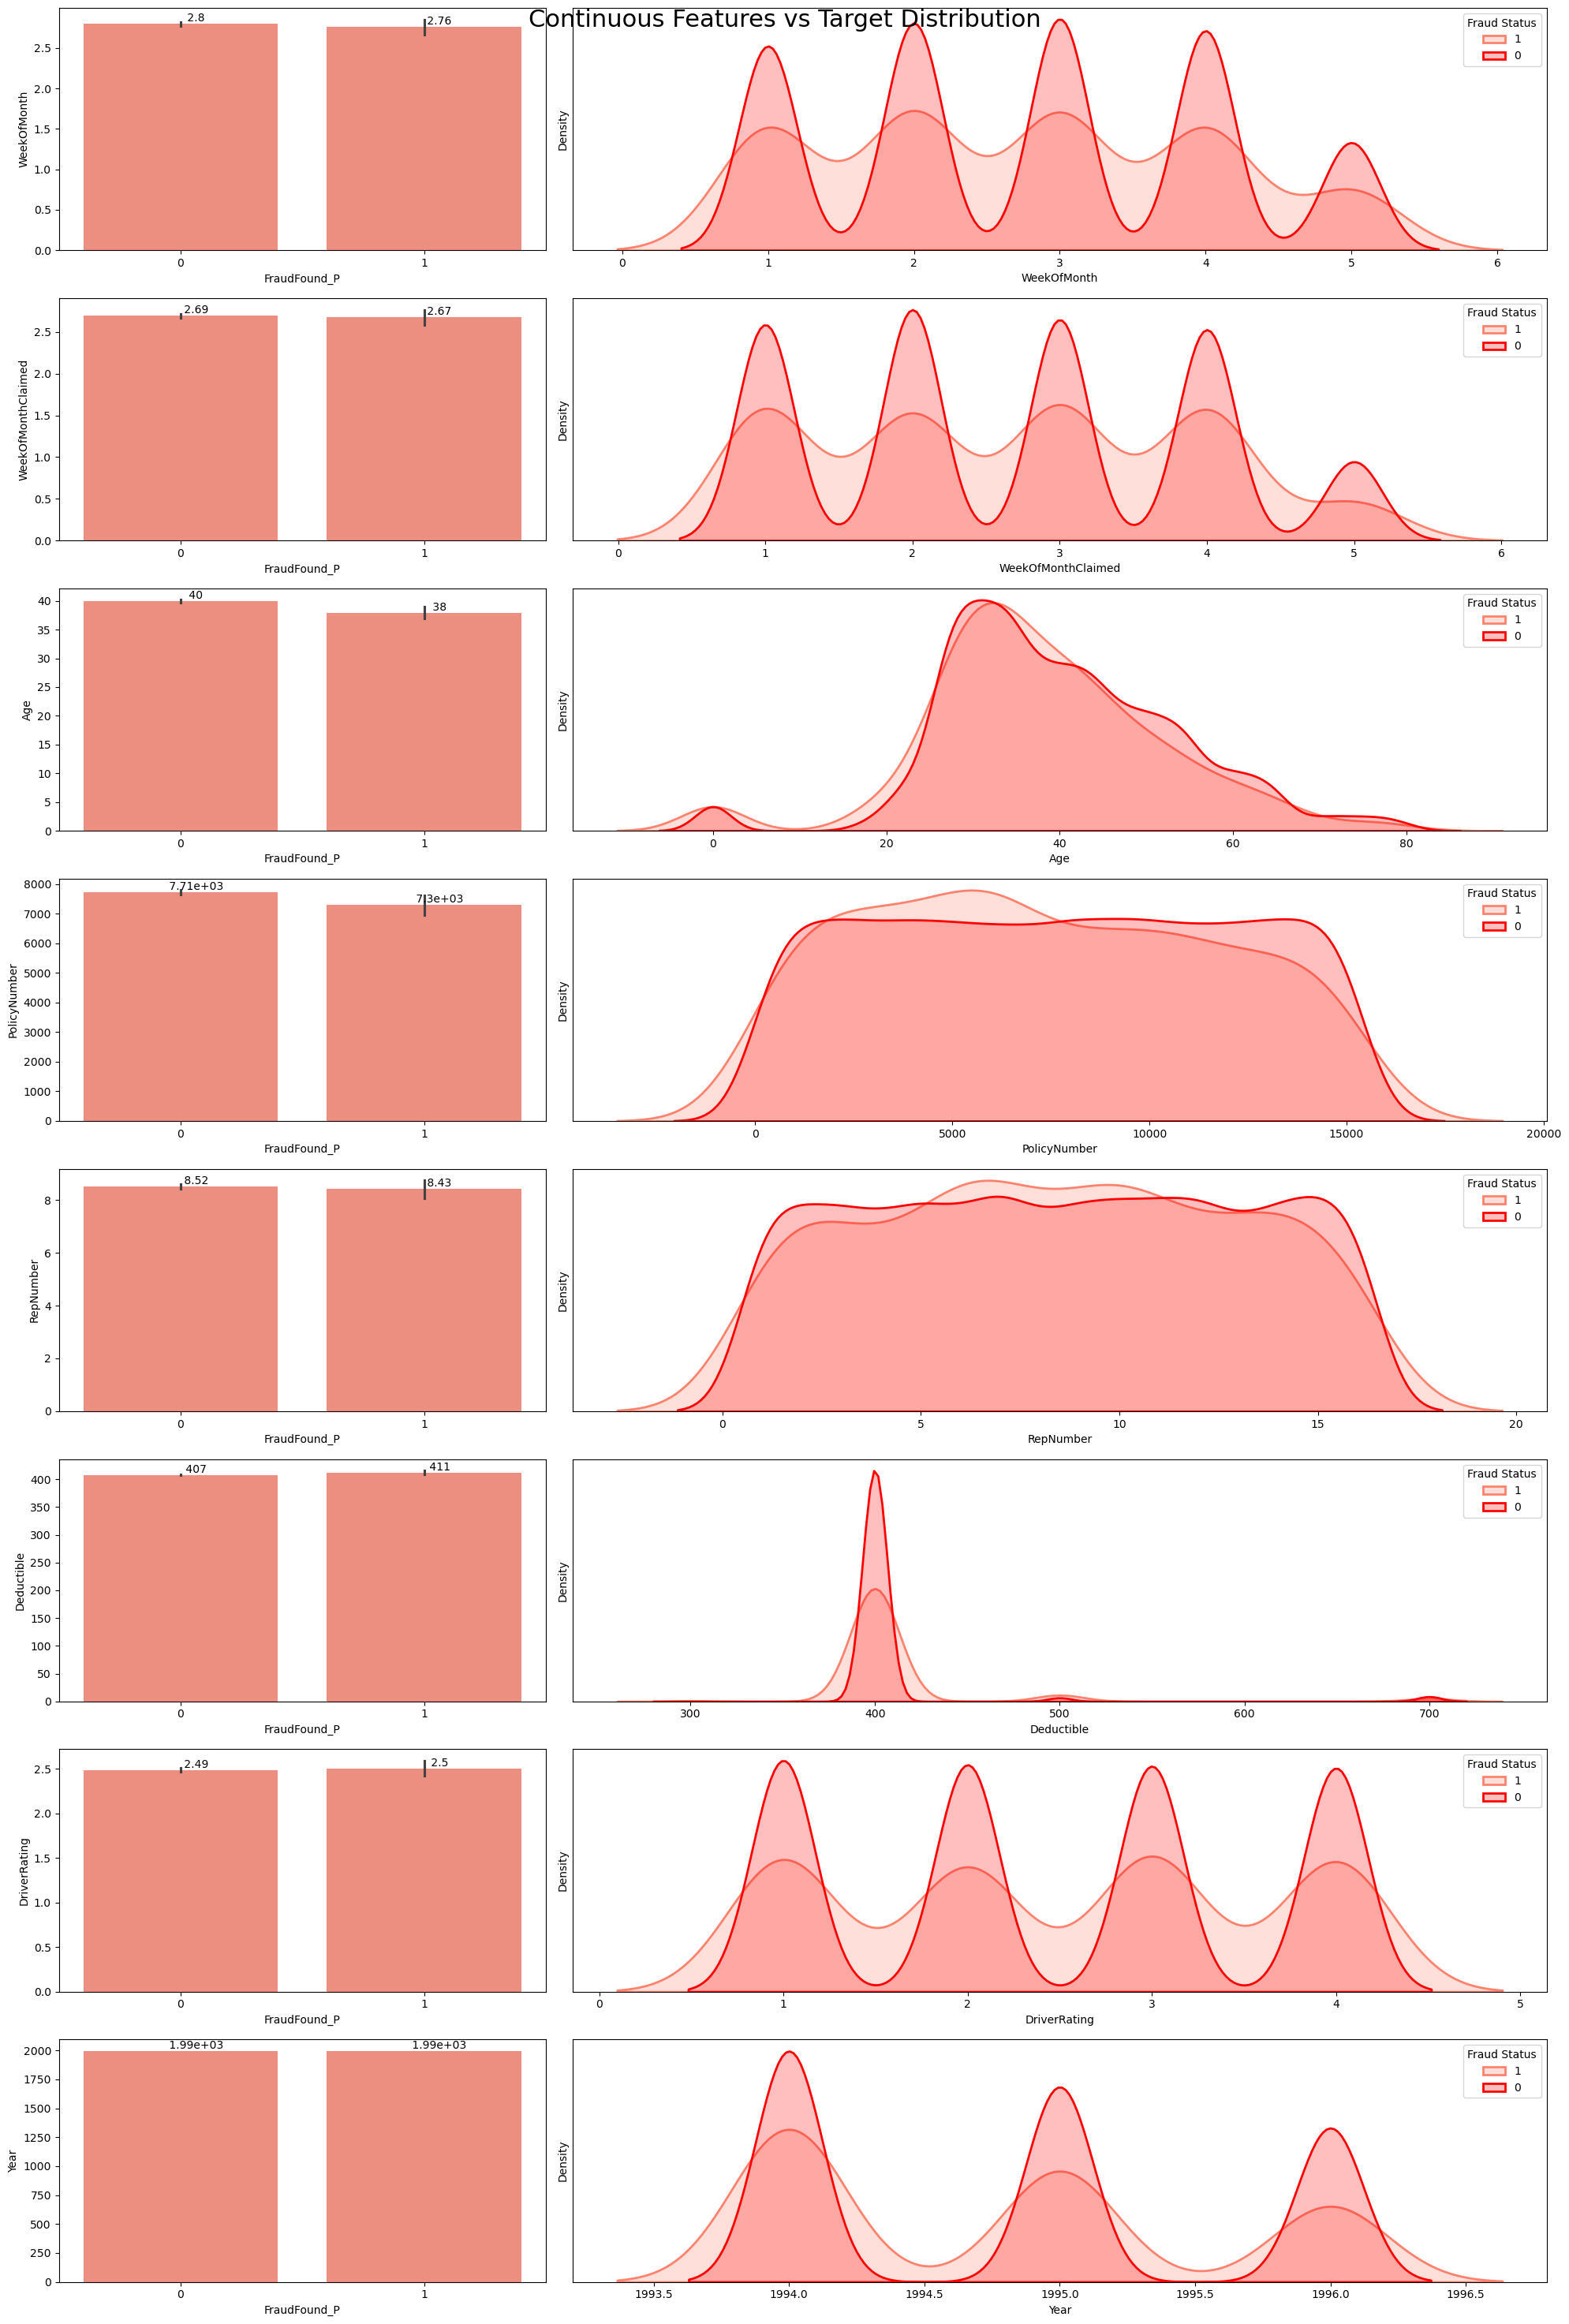

In [24]:
# Assuming 'df' is the DataFrame and you want to select only numeric columns
num_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Remove the target column 'FraudFound_P' from num_features
num_features = [feature for feature in num_features if feature != 'FraudFound_P']

# Define the target name as a variable for simplicity
Target = 'FraudFound_P'

# Set color palette
sns.set_palette(['#ff826e', 'red'])

# Create the subplots
fig, ax = plt.subplots(len(num_features), 2, figsize=(20,30), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(num_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=data, x=Target, y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=data[data[Target] == 1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    sns.kdeplot(data=data[data[Target] == 0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Fraud Status', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')

# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()


Inference:

For each feature, there are two visualizations:

Barplots: These show the mean value of the feature for the fraud and non-fraud categories.
KDE (Kernel Density Estimate) Plots: These illustrate the distribution of each feature for the fraud and non-fraud categories.

Feature-by-Feature Explanation:
WeekOfMonth:

Barplot: The average value of WeekOfMonth is almost the same for both fraud and non-fraud cases (approximately 2.8).
KDE Plot: There is a periodic pattern where the occurrences are concentrated across specific weeks. The distribution looks similar for both fraud and non-fraud, indicating that the WeekOfMonth feature may not be very helpful in distinguishing between fraud and non-fraud cases.
WeekOfMonthClaimed:

Barplot: Similar to WeekOfMonth, the mean value is nearly identical for fraud and non-fraud cases.
KDE Plot: Again, the pattern is periodic, and the distributions for fraud and non-fraud claims overlap significantly, which suggests that this feature is also not strongly predictive of fraud.
Age:

Barplot: The mean age of fraud cases (38) is slightly lower than for non-fraud cases (40).
KDE Plot: The distribution shows a clear difference between fraud and non-fraud cases. Fraudulent cases tend to occur more frequently in younger age groups (20–40), while non-fraud cases are more spread across a wider age range. This suggests that age might be a useful feature for distinguishing between fraud and non-fraud cases.
PolicyNumber:

Barplot: The mean PolicyNumber for both fraud and non-fraud cases is very similar.
KDE Plot: The distribution is relatively uniform, meaning that policy numbers are spread across a wide range for both fraud and non-fraud cases. This feature does not appear to provide much useful information for predicting fraud.
RepNumber:

Barplot: The mean RepNumber (report number) is slightly higher for fraud cases (8.63 vs. 8.52), though the difference is minimal.
KDE Plot: The distributions are fairly similar, and the feature does not seem to provide strong discriminatory power.
Deductible:

Barplot: The deductible for fraud cases is lower on average (411 vs. 467 for non-fraud cases).
KDE Plot: There is a notable spike in both distributions around 400, but non-fraud cases have a wider spread, suggesting that fraudulent cases might have a slightly lower deductible. This feature could be somewhat useful in distinguishing fraud.
DriverRating:

Barplot: The average DriverRating is slightly lower for fraud cases (2.5 vs. 2.49), though the difference is minimal.
KDE Plot: There are periodic patterns in the distribution, but they overlap significantly for fraud and non-fraud cases. This suggests the feature might not be very predictive.
Year:

Barplot: The mean Year for both fraud and non-fraud cases is almost identical.
KDE Plot: The distributions overlap significantly, suggesting the year is not an informative feature for fraud detection.

Age and Deductible seem to be the most promising features for distinguishing between fraud and non-fraud cases. Fraud tends to occur more frequently among younger individuals (20–40 years old), and fraudulent claims may be associated with lower deductibles.
WeekOfMonth and WeekOfMonthClaimed both exhibit periodic patterns, but they do not seem to provide much discriminatory power between fraud and non-fraud cases.
Features like PolicyNumber, RepNumber, DriverRating, and Year do not show significant differences between fraud and non-fraud cases, suggesting they may not be very useful for predicting fraud.

# 5.2 Categorical Features vs Target

In [26]:
#Low Cardinality Categorical Features vs Target

In [27]:
test_df = list(set(low_cardinality_fea) | set(bin_categorical_columns))
test_df

['AccidentArea',
 'Days_Policy_Claim',
 'AgentType',
 'AgeOfPolicyHolder',
 'Days_Policy_Accident',
 'NumberOfCars',
 'PolicyType',
 'AddressChange_Claim',
 'WitnessPresent',
 'AgeOfVehicle',
 'MonthClaimed',
 'MaritalStatus',
 'BasePolicy',
 'Month',
 'Sex',
 'Fault',
 'NumberOfSuppliments',
 'PoliceReportFiled',
 'DayOfWeekClaimed',
 'VehicleCategory',
 'VehiclePrice',
 'DayOfWeek',
 'PastNumberOfClaims']

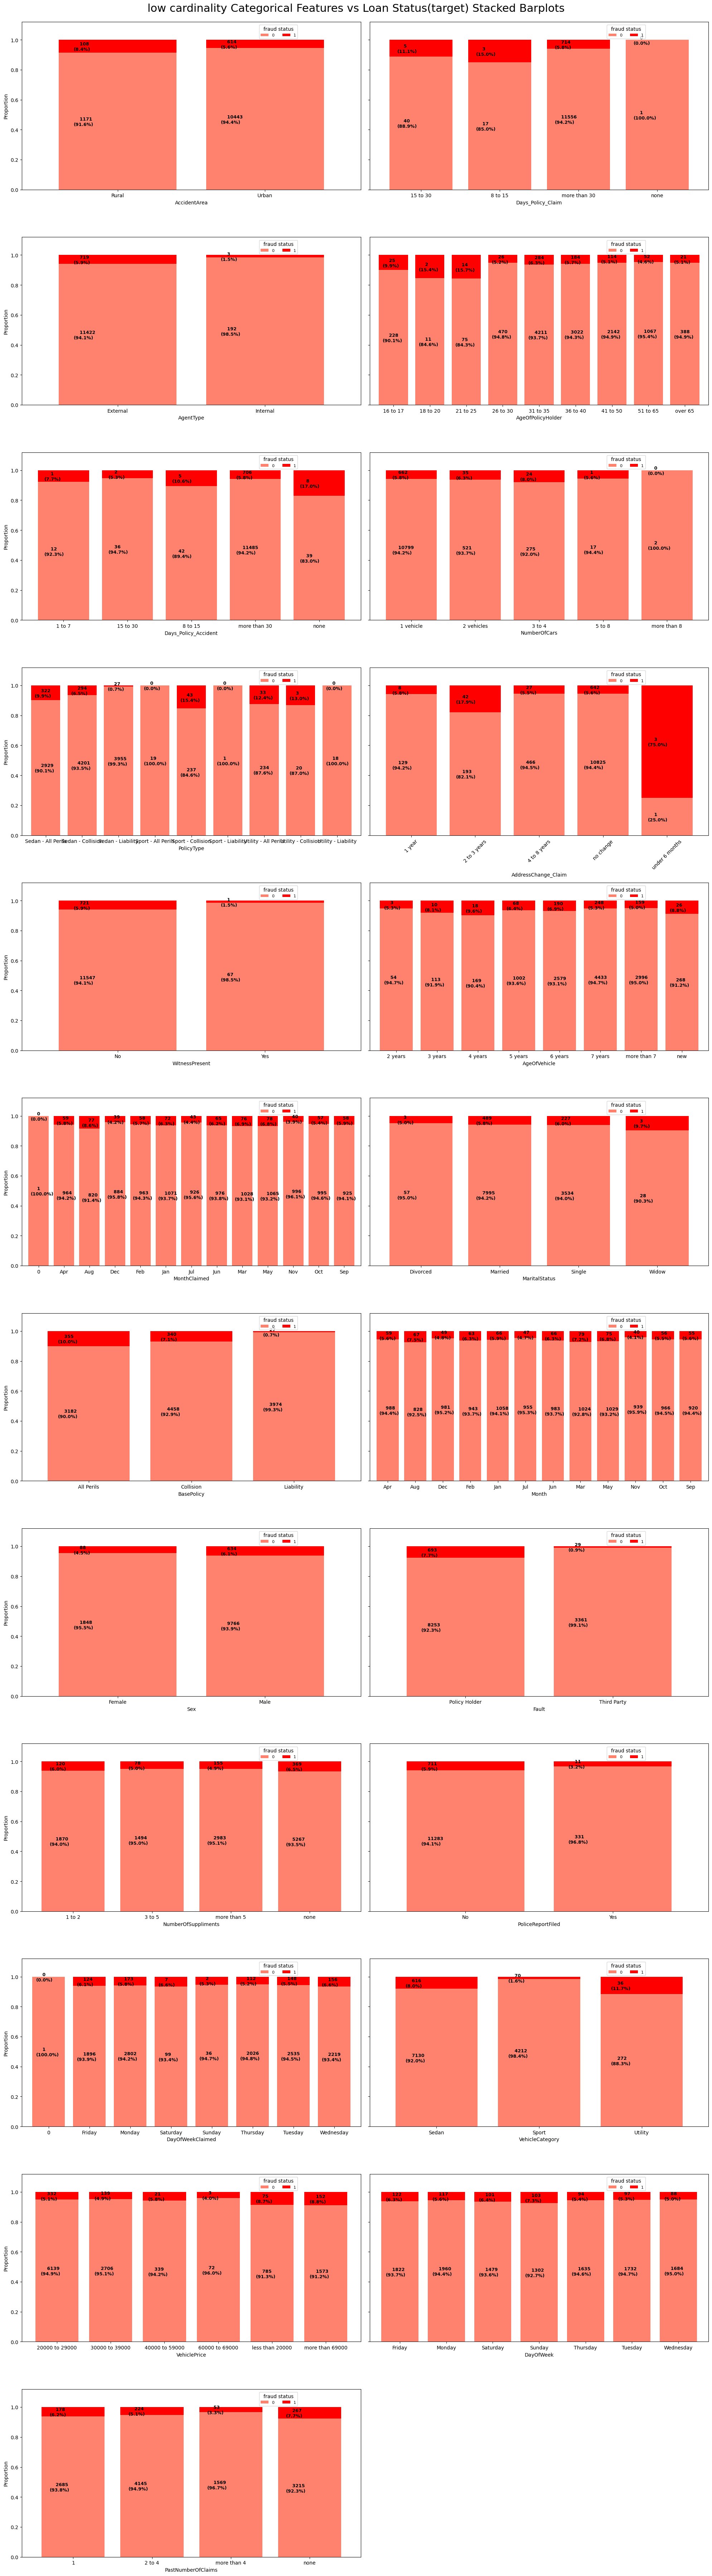

In [28]:
# Calculate the number of required subplots
num_plots = len(test_df)
num_rows = (num_plots + 1) // 2  # Add one extra row if the number of plots is odd

# Set up the subplot
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 6))

for i, col in enumerate(test_df):
    # Calculate the row and column index
    x, y = i // 2, i % 2
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=data[col], columns=data['FraudFound_P'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=data[col], columns=data['FraudFound_P'], normalize='index')   
    
    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[x, y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x, y].legend(title='fraud status', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x, y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation=0)
    
ax[3, 1].set_xticklabels(ax[3, 1].get_xticklabels(), rotation=45)   
# Remove empty subplot if the number of plots is odd
if num_plots % 2 != 0:
    fig.delaxes(ax[num_rows-1, 1])
    
# Set title outside the subplots
plt.suptitle('low cardinality Categorical Features vs Loan Status(target) Stacked Barplots', fontsize=22, y=0.999)
plt.tight_layout()                     
plt.show()

ActiveStatus:
Individuals with "Active" status have a higher probability of not defaulting (light red), while a small proportion defaults (dark red).
"Closed" loans show a similar pattern, with a slightly higher proportion of defaults.

Dura_Relay_Days:
Most loans fall within the '0-15' days range for the duration relay.
The proportion of defaults (dark red) is higher for loans in the '31-45' days and beyond.

BuilderLoan:
The distribution is fairly balanced between "Builder" and "Non-Builder" loans, with "Non-Builder" loans having a slightly higher default rate.

AgeGroupofBorrower:
Borrowers aged between '31-40' and '41-50' have a higher number of loans with slightly lower default rates, while younger and older borrowers show a lower overall count with a higher percentage of defaults.

HomeOwner:
There is a distinct difference between "Homeowner" and "Non-Homeowner" groups, with non-homeowners showing a higher proportion of defaults.

LeadSource:
Different lead sources contribute varied proportions of loans. Notably, "Referral" and "Branch" sources show the highest counts and higher proportions of defaults.

Loan_Year:
Loans disbursed in recent years tend to have a slightly higher proportion of defaults, particularly in the most recent year of data.

WeekBorrowed:
There is no significant difference across weeks in terms of default proportions.

BorrowerHistory:
Borrowers with "Poor" history show a higher default rate compared to those with "Good" or "Excellent" histories.

CityTier:
Loans from Tier 1 cities have a higher overall count with a relatively lower default rate, whereas Tier 3 cities show a higher proportion of defaults.

Gender:
There are more male borrowers, but both genders show a similar proportion of defaults.

MaritalStatus:
Married individuals take out more loans, with slightly fewer defaults compared to single individuals.

PersonalParty:
Loans classified under "Personal" show a higher count, with a relatively even distribution of defaults across categories.

LoanPurpose:
Loans for "Business" and "Personal" purposes show the highest count, with personal loans showing slightly higher default rates.

EmploymentStatus:
Employed borrowers make up the majority of loans, showing a lower default rate compared to self-employed individuals.

Education:
The majority of loans are distributed to individuals with "Graduate" education, with slightly fewer defaults among higher-educated groups.

WeekofMonthBorrowed:
Loan defaults do not significantly vary across different weeks of the month.

WelfareStatus:
Individuals not on welfare take out more loans, but those on welfare show a slightly higher default rate.

HouseholdSize:
Larger household sizes (e.g., '4-6') show a slightly higher default rate compared to smaller households.

FirstTimeBorrower:
First-time borrowers show a higher default rate compared to repeat borrowers.

# 5.3 High Cardinality Categorical Features vs Target

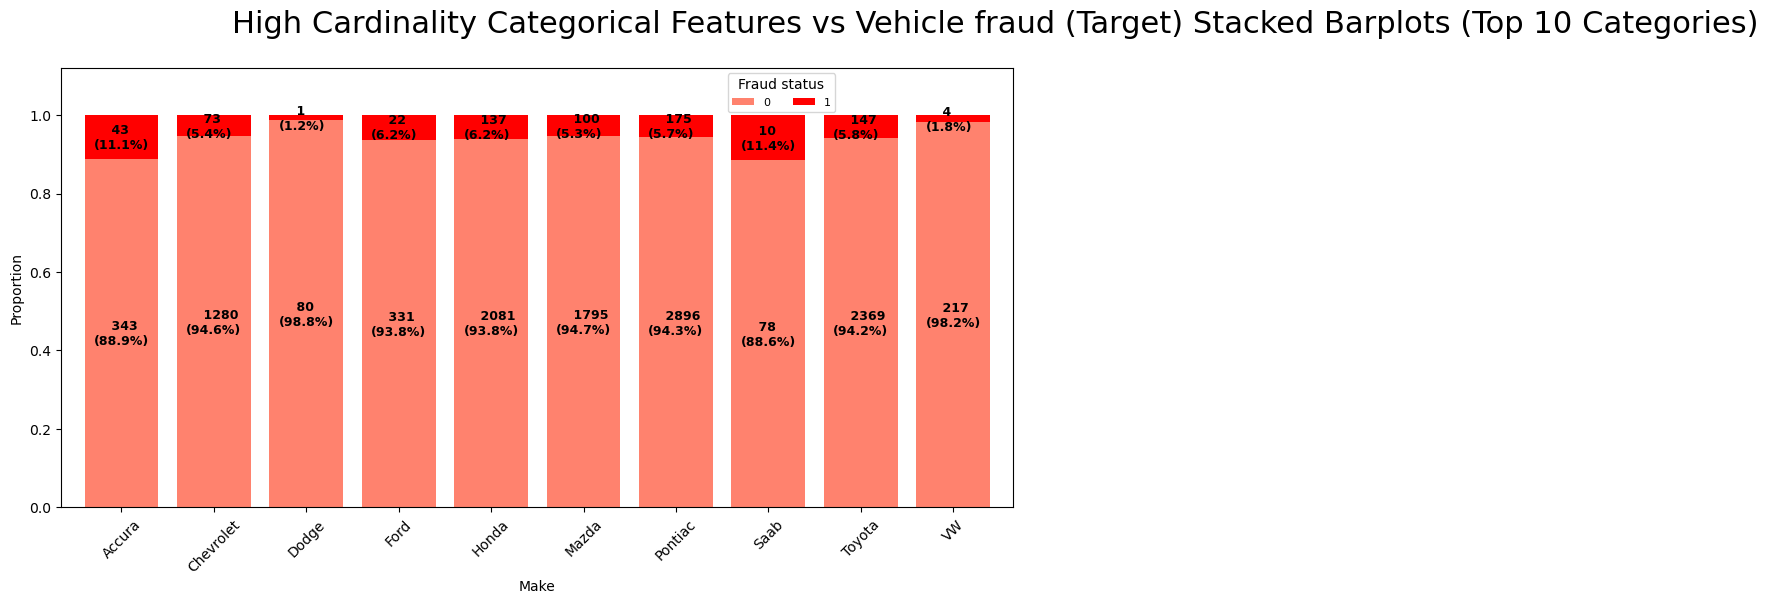

In [29]:
# Calculate the number of required subplots
num_plots = len(high_cardinality_fea)
num_rows = (num_plots + 1) // 2  # Add one extra row if the number of plots is odd

# Set up the subplot grid (2 columns, dynamic rows)
fig, ax = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, num_rows * 6))

# Flatten ax array in case it's multidimensional
ax = ax.ravel()

for i, col in enumerate(high_cardinality_fea):
    # Get the top 10 most occurring categories
    top_categories = data[col].value_counts().head(10).index
    
    # Subset the dataframe to include only the top 10 categories
    subset_df = data[data[col].isin(top_categories)]
    
    # Create a cross tabulation showing the proportion of loan statuses for each category of the feature
    cross_tab = pd.crosstab(index=subset_df[col], columns=subset_df['FraudFound_P'])
    
    # Normalize to get index-wise proportions
    cross_tab_prop = pd.crosstab(index=subset_df[col], columns=subset_df['FraudFound_P'], normalize='index')   
    
    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    cross_tab_prop.plot(kind='bar', ax=ax[i], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val], cross_tab_prop.loc[val].cumsum()):
            ax[i].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s=f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color="black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[i].legend(title='Fraud status', loc=(0.7, 0.9), fontsize=8, ncol=2)
    
    # Set y limit
    ax[i].set_ylim([0, 1.12])
    
    # Rotate xticks
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)

# If the number of plots is odd, remove the extra subplot
if num_plots % 2 != 0:
    fig.delaxes(ax[-1])

# Set title outside the subplots
plt.suptitle('High Cardinality Categorical Features vs Vehicle fraud (Target) Stacked Barplots (Top 10 Categories)', fontsize=22, y=0.999)
plt.tight_layout()                     
plt.show()


# 6. Data Preprocessing

In [36]:
#Feature Subset Selection

# 6.1 Handle Missing Values

In [30]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

There are no missing values in this dataset. All columns have non-null counts for all entries.

# 6.2 Handle Duplicate Values

In [31]:
data.duplicated().sum()

0

There are no duplicate values in this dataset.

# 6.3 Treating Outliers

In [33]:
Q1 = data[num_features].quantile(0.25)
Q3 = data[num_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((data[num_features] < (Q1 - 1.5 * IQR)) | (data[num_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

WeekOfMonth             0
WeekOfMonthClaimed      0
Age                   327
PolicyNumber            0
RepNumber               0
Deductible            465
DriverRating            0
Year                    0
dtype: int64

Outliers Identification:
Upon identifying outliers for the specified numerical features, we found the following counts of outliers:

Age: 327 outliers
Deductible: 465 outliers
FraudFound_P: 722 outliers

Sensitivity to Outliers

- Decision Trees (DT) and Random Forests (RF): These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.
- Logistic Regression: Logistic regression can be sensitive to outliers, especially if the outliers are influential points that disproportionately affect the estimated coefficients. Outliers can distort the estimated relationships between the independent variables and the log-odds of the dependent variable, potentially leading to biased parameter estimates and reduced model performance.

# Approaches for Outlier Treatment:

- Removal of Outliers: Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).
- Capping Outliers: Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.
- Transformations: Applying transformations like log or Box-Cox can reduce the impact of outliers and make the data more Gaussian-like.
- Robust Scaling: Techniques like the RobustScaler in Scikit-learn can be used, which scales features using statistics that are robust to outliers.

Given the nature of the algorithms (especially Logistic Regression) and the small size of our dataset, direct removal of outliers might not be the best approach. Instead, we'll focus on applying transformations like Box-Cox in the subsequent steps to reduce the impact of outliers and make the data more suitable for modeling.

# 6.4 Encode Categorical Variables

In [34]:
#list all the cols we mentioned above. 
cols = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
#We now create 2 lists, these lists  help us create 0 and 1 values for our col values later
#Aval is for 1, Bval is those we assign 0 to.
Aval = ['Urban','Female','Policy Holder', 'Yes', 'Yes','External']
Bval = ['Rural', 'Male', 'Third Party', 'No', 'No', 'Internal']

#We just now loop over each column in the above list and assign 1 to our Avals and 0 to bVals.
for i in range(len(cols)):
    X_idx1 = data[cols[i]]==Aval[i]
    X_idx2 = data[cols[i]]==Bval[i]

    data.loc[list(X_idx1),cols[i]]=1
    data.loc[list(X_idx2),cols[i]]=0

In [35]:
#lets look at the data again now to see what happened
data

Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Aug            2   Saturday  Pontiac            1        Wednesday   
1       Jun            3  Wednesday   Toyota            1          Tuesday   
2       Apr            1     Monday    Honda            1           Friday   
3       Aug            1  Wednesday    Honda            1           Friday   
4       Apr            1   Saturday     Saab            1        Wednesday   
...     ...          ...        ...      ...          ...              ...   
12331   Dec            4     Friday  Pontiac            1          Tuesday   
12332   Feb            3    Tuesday   Saturn            1           Monday   
12333   Jan            1  Wednesday    Mazda            1           Friday   
12334   Dec            1     Monday   Toyota            0          Tuesday   
12335   May            1     Sunday    Honda            1           Monday   

      MonthClaimed  WeekOfMonthClaimed Sex MaritalStatus  ...  AgeOfVehicle  \
0              Sep                   2   0       Married  ...   more than 7   
1              Jul                   3   1       Married  ...       6 years   
2              Apr                   2   0       Married  ...   more than 7   
3              Aug                   1   0        Single  ...       6 years   
4              Apr                   2   0       Married  ...       7 years   
...            ...                 ...  ..           ...  ...           ...   
12331          Jan                   1   0        Single  ...       5 years   
12332          Feb                   3   0       Married  ...       7 years   
12333          Jan                   2   0       Married  ...       7 years   
12334          May                   3   0       Married  ...   more than 7   
12335          May                   1   0        Single  ...           new   

      AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0              41 to 50                 0              0         1   
1              41 to 50                 0              0         1   
2              51 to 65                 0              0         1   
3              26 to 30                 0              0         1   
4              51 to 65                 0              0         1   
...                 ...               ...            ...       ...   
12331          26 to 30                 0              0         1   
12332          36 to 40                 0              0         1   
12333          36 to 40                 0              0         1   
12334          36 to 40                 0              0         1   
12335          16 to 17                 0              0         1   

       NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
0                   3 to 5            no change     1 vehicle  1994   
1                     none            no change     1 vehicle  1995   
2                     none            no change     1 vehicle  1994   
3              more than 5            no change     1 vehicle  1994   
4              more than 5            no change     1 vehicle  1996   
...                    ...                  ...           ...   ...   
12331                 none            no change     1 vehicle  1996   
12332               1 to 2            no change     1 vehicle  1996   
12333               1 to 2         4 to 8 years    2 vehicles  1996   
12334          more than 5       under 6 months    2 vehicles  1994   
12335                 none            no change     1 vehicle  1994   

       BasePolicy  
0       Collision  
1       Liability  
2       Collision  
3       Collision  
4      All Perils  
...           ...  
12331   Collision  
12332  All Perils  
12333   Collision  
12334  All Perils  
12335   Collision  

[12336 rows x 33 columns]

# 6.5 Ordinal Encoder

In this section we learn about a new type of encoding called Ordinal Encoder, this is done for categorical variables. Ordinal encoder takes care of encoding non binary type of categorical variables i.e which can't be encoded to 0-1

The idea behind ordinal encoder is that for all the columns we pass, it will replace the text with nunmbers starting 0 and till the end of the unique values' list. So if we have the values "A,B,C" in the column, the orinal encoder will make it 0,1,2

In [36]:
#lets create the OrdinalEncoder object imported earlier above
enc = OrdinalEncoder()
#we make a list of all the columns on which we want to make ordinalEncoding
ordinalList=["Month","DayOfWeek", "DayOfWeekClaimed","MonthClaimed","PastNumberOfClaims","NumberOfSuppliments",'Make','MaritalStatus','PolicyType','VehicleCategory','BasePolicy']
#fit the ordinalEncoder to this data.
data[ordinalList] = enc.fit_transform(data[ordinalList])
#lets look at the data first.
data

Month  WeekOfMonth  DayOfWeek  Make AccidentArea  DayOfWeekClaimed  \
0        1.0            2        2.0  13.0            1               7.0   
1        6.0            3        6.0  17.0            1               6.0   
2        0.0            1        1.0   6.0            1               1.0   
3        1.0            1        6.0   6.0            1               1.0   
4        0.0            1        2.0  15.0            1               7.0   
...      ...          ...        ...   ...          ...               ...   
12331    2.0            4        0.0  13.0            1               6.0   
12332    3.0            3        5.0  16.0            1               2.0   
12333    4.0            1        6.0   9.0            1               1.0   
12334    2.0            1        1.0  17.0            0               6.0   
12335    8.0            1        3.0   6.0            1               2.0   

       MonthClaimed  WeekOfMonthClaimed Sex  MaritalStatus  ...  AgeOfVehicle  \
0              12.0                   2   0            1.0  ...   more than 7   
1               6.0                   3   1            1.0  ...       6 years   
2               1.0                   2   0            1.0  ...   more than 7   
3               2.0                   1   0            2.0  ...       6 years   
4               1.0                   2   0            1.0  ...       7 years   
...             ...                 ...  ..            ...  ...           ...   
12331           5.0                   1   0            2.0  ...       5 years   
12332           4.0                   3   0            1.0  ...       7 years   
12333           5.0                   2   0            1.0  ...       7 years   
12334           9.0                   3   0            1.0  ...   more than 7   
12335           9.0                   1   0            2.0  ...           new   

      AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent AgentType  \
0              41 to 50                  0               0         1   
1              41 to 50                  0               0         1   
2              51 to 65                  0               0         1   
3              26 to 30                  0               0         1   
4              51 to 65                  0               0         1   
...                 ...                ...             ...       ...   
12331          26 to 30                  0               0         1   
12332          36 to 40                  0               0         1   
12333          36 to 40                  0               0         1   
12334          36 to 40                  0               0         1   
12335          16 to 17                  0               0         1   

       NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  \
0                      1.0            no change     1 vehicle  1994   
1                      3.0            no change     1 vehicle  1995   
2                      3.0            no change     1 vehicle  1994   
3                      2.0            no change     1 vehicle  1994   
4                      2.0            no change     1 vehicle  1996   
...                    ...                  ...           ...   ...   
12331                  3.0            no change     1 vehicle  1996   
12332                  0.0            no change     1 vehicle  1996   
12333                  0.0         4 to 8 years    2 vehicles  1996   
12334                  2.0       under 6 months    2 vehicles  1994   
12335                  3.0            no change     1 vehicle  1994   

       BasePolicy  
0             1.0  
1             2.0  
2             1.0  
3             1.0  
4             0.0  
...           ...  
12331         1.0  
12332         0.0  
12333         1.0  
12334         0.0  
12335         1.0  

[12336 rows x 33 columns]

# 6.6. Custom Encoding

For some columns, we can't do the encoding straightaway, we need custom values to those strings, for them we use the custom encoding below.

In [37]:
#We create a dictionary estabilishing the connection between the unique col vlaues and the value we want
# to assign them
col_map = [{'Days_Policy_Accident':{'more than 30':31,'15 to 30':22.5,'none':0,'1 to 7':4,'8 to 15':11.5}},
    {'Days_Policy_Claim':{'more than 30':31,'15 to 30':22.5,'8 to 15':11.5,'none':0}},
    {'AgeOfPolicyHolder':{'26 to 30':28,'31 to 35':33,'41 to 50':45.5,'51 to 65':58,'21 to 25':23,'36 to 40':38,'16 to 17':16.5,
                                          'over 65':66,'18 to 20':19}},
    {'AddressChange_Claim':{'1 year':1,'no change':0,'4 to 8 years':6,'2 to 3 years':2.5,'under 6 months':0.5}},
    {'NumberOfCars':{'3 to 4':3.5,'1 vehicle':1,'2 vehicles':2,'5 to 8':6.5,'more than 8':9}},
    {'VehiclePrice': {'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'AgeOfVehicle':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}}
           
]
#We create a data copy, since its always good to create a data copy when transforming columns. 
newData = data.copy()
#now we just loop over the required columns, and replace them with the needed values
for i in range(len(col_map)):
    newData.replace(col_map[i], inplace=True)

In [38]:

#lets look at the datatypes now to see how many obhject values do we still have remaining
newData.dtypes

Month                   float64
WeekOfMonth               int64
DayOfWeek               float64
Make                    float64
AccidentArea             object
DayOfWeekClaimed        float64
MonthClaimed            float64
WeekOfMonthClaimed        int64
Sex                      object
MaritalStatus           float64
Age                       int64
Fault                    object
PolicyType              float64
VehicleCategory         float64
VehiclePrice              int64
FraudFound_P              int64
PolicyNumber              int64
RepNumber                 int64
Deductible                int64
DriverRating              int64
Days_Policy_Accident    float64
Days_Policy_Claim       float64
PastNumberOfClaims      float64
AgeOfVehicle              int64
AgeOfPolicyHolder       float64
PoliceReportFiled        object
WitnessPresent           object
AgentType                object
NumberOfSuppliments     float64
AddressChange_Claim     float64
NumberOfCars            float64
Year    

We still have a few columns remaining, lets see.

In [39]:
#this is another way of looking at the object data, other than what we learnt earlier
newData.loc[:, newData.dtypes == object].columns

Index(['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent',
       'AgentType'],
      dtype='object')

In [40]:
#We use the above technique to convert all the reamaining columns who are by values by numeric
#but data type is object
objCols=newData.loc[:, newData.dtypes == object].columns
newData[objCols]=newData[objCols].apply(pd.to_numeric)

# 7. Handling Imbalanced Data

In [41]:
# lets explore the target feature
newData['FraudFound_P'].value_counts()

FraudFound_P
0    11614
1      722
Name: count, dtype: int64

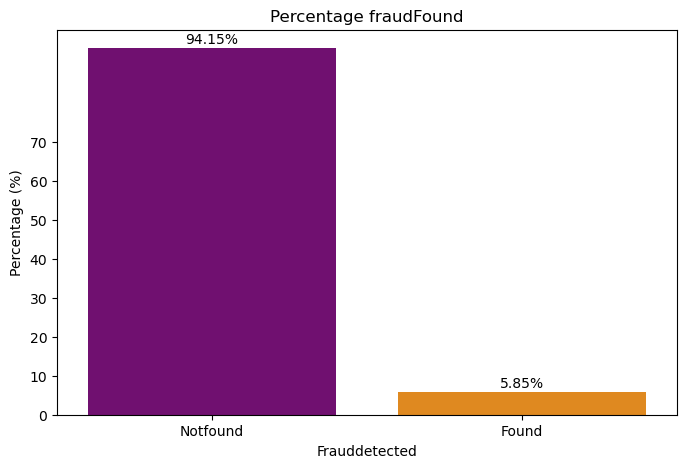

In [42]:
import seaborn as sns
# Calculating the percentage of each class
percentage = newData['FraudFound_P'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['purple', 'darkorange'])
plt.title('Percentage fraudFound')
plt.xlabel('Frauddetected')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Notfound','Found'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

The bar plot shows the percentage of FRAUD (Yes/No) in the dataset. Approximately 94.15% of the samples are labeled as 'No', indicating no FRAUD, while 5.85% of the samples are labeled as 'Yes', indicating attrition. This suggests that there is a high imbalance in the target feature.

To address this, we will use SMOTE (Synthetic Minority Over-sampling Technique). SMOTE is a technique used to generate synthetic samples for the minority class in order to balance the class distribution in the dataset. By creating synthetic samples, SMOTE helps mitigate the impact of class imbalance and improves the performance of machine learning models in predicting the minority class.

In [43]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(newData.drop('FraudFound_P', axis=1), newData['FraudFound_P'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

# 7.1 Transforming Skewed Features

In [45]:
# Define the features (X) and the output labels (y)
X = oversampled.drop(['FraudFound_P'], axis = 1)
y = oversampled['FraudFound_P']

In [46]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [47]:
num_features

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Year']

In [48]:
# Adding a small constant to make all values positive

columns = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

for col in columns:
    X_train[col] += 0.001
    X_test[col] += 0.001

In [49]:
from sklearn.preprocessing import power_transform
X_train[list(columns)] = power_transform(X_train[list(columns)], method='box-cox')

In [50]:
X_test[list(columns)] = power_transform(X_test[list(columns)], method='box-cox')

# 7.2 Feature Selection

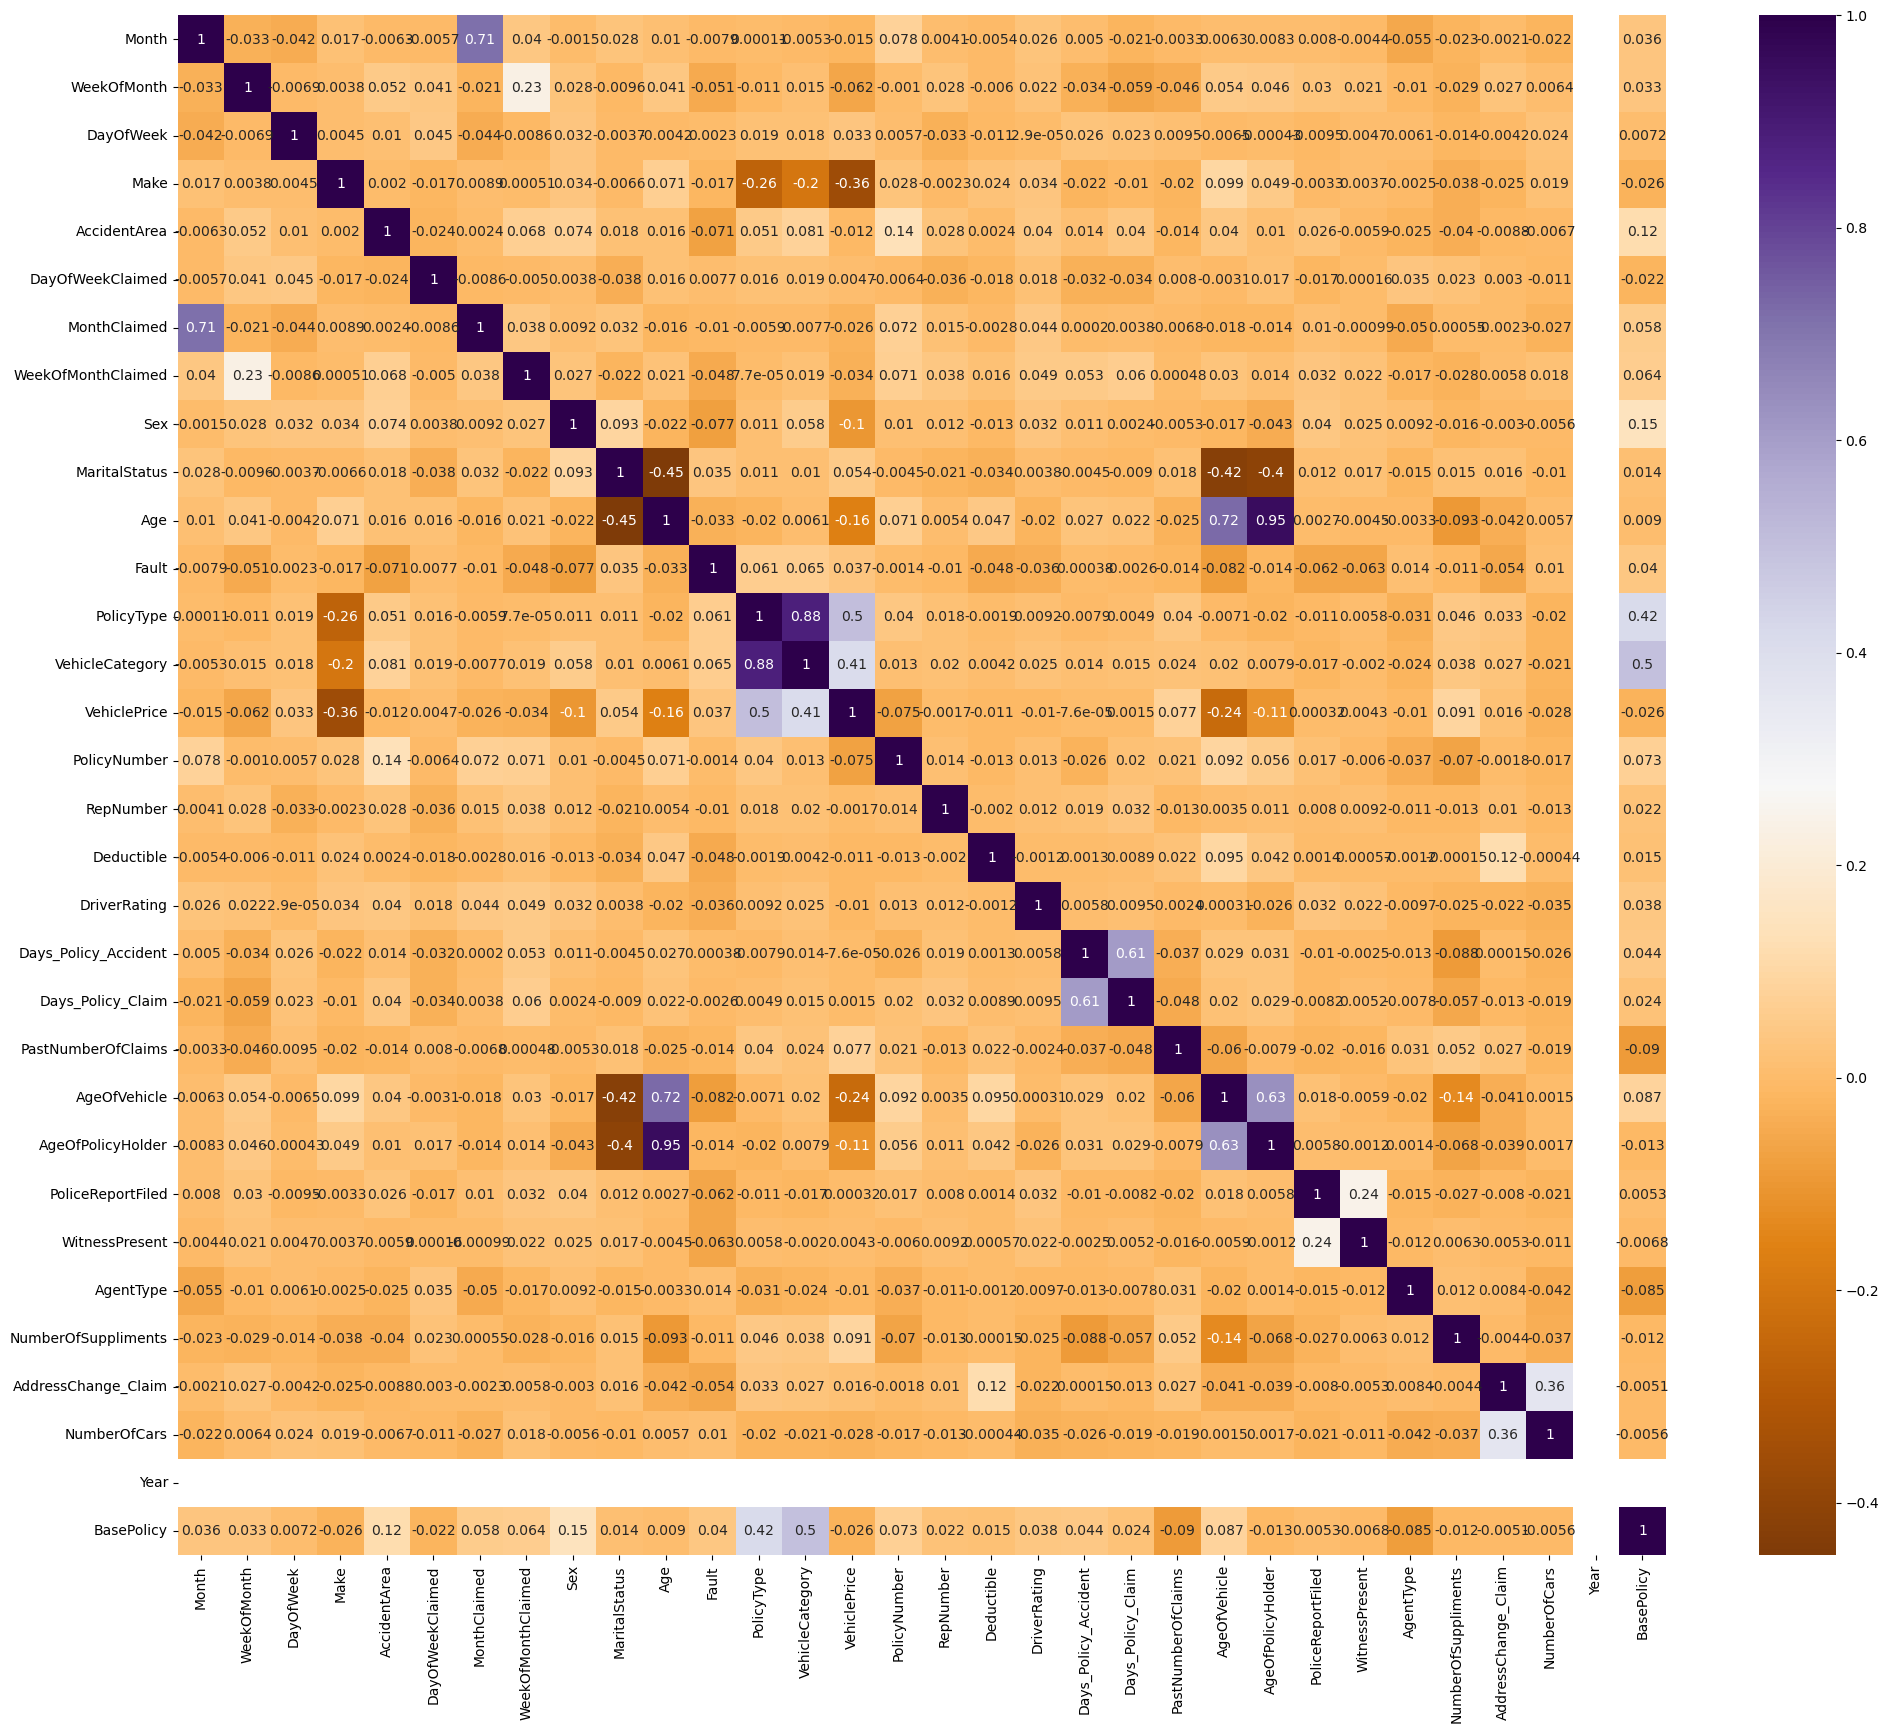

In [51]:
#Using Pearson Correlation
plt.figure(figsize=(24,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuOr)
plt.show()

In [52]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [53]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

4

In [54]:
corr_features

{'AgeOfPolicyHolder', 'AgeOfVehicle', 'MonthClaimed', 'VehicleCategory'}

In [55]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

Month  WeekOfMonth  DayOfWeek       Make  AccidentArea  \
15486    0.0     1.083270   1.013132  13.000000             1   
16139    2.0    -0.417399   4.809977  11.413302             1   
7145     4.0    -0.417399   3.000000   5.000000             1   
5433     5.0    -1.472705   2.000000  13.000000             1   
2970    10.0    -0.417399   2.000000  13.000000             1   
...      ...          ...        ...        ...           ...   
15526    6.0     1.083270   5.582705  16.165411             1   
4679     2.0    -0.417399   0.000000   6.000000             1   
10089   10.0     1.083270   0.000000  13.000000             1   
8656     7.0    -1.472705   0.000000   2.000000             0   
2397     4.0    -1.472705   4.000000  13.000000             1   

       DayOfWeekClaimed  WeekOfMonthClaimed  Sex  MaritalStatus       Age  \
15486          6.662289           -1.419037    0       1.000000  0.216334   
16139          7.000000            0.523046    0       1.603326  1.207505   
7145           2.000000           -0.301317    0       1.000000  0.981599   
5433           5.000000           -0.301317    0       1.000000  0.216334   
2970           2.000000           -0.301317    0       1.000000  0.677878   
...                 ...                 ...  ...            ...       ...   
15526          2.000000            1.200617    0       1.000000 -0.253428   
4679           2.000000            0.523046    0       2.000000 -1.308150   
10089          1.000000            1.786464    0       1.000000 -0.332626   
8656           7.000000           -0.301317    0       2.000000 -1.141840   
2397           6.000000            1.200617    0       2.000000 -1.059317   

       ...  Days_Policy_Claim  PastNumberOfClaims  PoliceReportFiled  \
15486  ...               31.0            0.337711                  0   
16139  ...               31.0            2.000000                  0   
7145   ...               31.0            3.000000                  0   
5433   ...               31.0            1.000000                  0   
2970   ...               31.0            0.000000                  0   
...    ...                ...                 ...                ...   
15526  ...               31.0            2.374058                  0   
4679   ...               31.0            3.000000                  0   
10089  ...               31.0            1.000000                  0   
8656   ...               31.0            1.000000                  0   
2397   ...               31.0            3.000000                  0   

       WitnessPresent  AgentType  NumberOfSuppliments  AddressChange_Claim  \
15486               0          1             2.662289                  0.0   
16139               0          1             1.396674                  0.0   
7145                0          1             1.000000                  0.0   
5433                0          1             0.000000                  0.0   
2970                0          1             0.000000                  0.0   
...               ...        ...                  ...                  ...   
15526               0          1             1.582705                  0.0   
4679                0          1             3.000000                  0.0   
10089               0          1             1.000000                  0.0   
8656                0          1             0.000000                  6.0   
2397                0          1             3.000000                  0.0   

       NumberOfCars  Year  BasePolicy  
15486           1.0   0.0    0.337711  
16139           1.0   0.0    1.000000  
7145            1.0   0.0    0.000000  
5433            1.0   0.0    2.000000  
2970            1.0   0.0    1.000000  
...             ...   ...         ...  
15526           1.0   0.0    0.791353  
4679            1.0   0.0    0.000000  
10089           1.0   0.0    0.000000  
8656            2.0   0.0    1.000000  
2397            1.0   0.0    0.000000  

[4646 rows x 28 co

# 8. Logistic Regression Model Building

In [44]:
#LogisticReg Base Model Definition

In [45]:
#First of all, let's define the base LR model and set up the pipeline with scaling.

In [56]:
# Define the base KNN model and set up the pipeline with scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
LogR_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logR',LogisticRegression())
])

# 8.1 LogisticReg Hyperparameter Tuning

In [57]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest F1-score for class 1 (canceled bookings) is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

In [58]:
# Hyperparameter grid for Logistic Regression
param_grid_LogR = {
    'logR__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logR__solver': ['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
}


In [59]:
# Hyperparameter tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

best_LogR, best_LogR_hyperparams = tune_clf_hyperparameters(LogR_pipeline, param_grid_LogR, X_train, y_train)
print('Logistic Regression Optimal Hyperparameters: \n', best_LogR_hyperparams)

Logistic Regression Optimal Hyperparameters: 
 {'logR__C': 1, 'logR__solver': 'sag'}


# 8.2 LogisticReg Model Evaluation

In [60]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [61]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    
    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap
    purple_cmap = colors.LinearSegmentedColormap.from_list("darkorange", ["darkorange", "white"])
    
    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=purple_cmap, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2, color='purple')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('#E6CCE6')
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.72      0.77      9291
           1       0.75      0.85      0.80      9291

    accuracy                           0.78     18582
   macro avg       0.79      0.78      0.78     18582
weighted avg       0.79      0.78      0.78     18582


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      2323
           1       0.81      0.68      0.74      2323

    accuracy                           0.76      4646
   macro avg       0.76      0.76      0.75      4646
weighted avg       0.76      0.76      0.75      4646



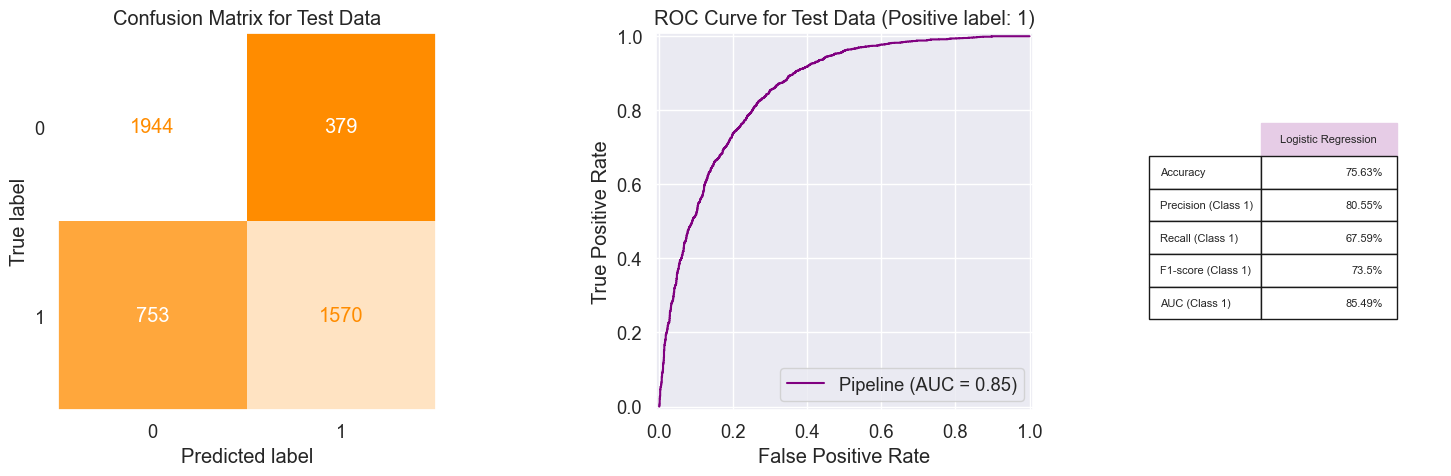

In [62]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,RocCurveDisplay
import matplotlib.colors as colors
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


model_evaluation(best_LogR, X_train, X_test, y_train, y_test, 'Logistic Regression')

# Inference:

1. Confusion Matrix
Description: The confusion matrix shows the performance of the model in distinguishing between the two classes (0 and 1).
True Negatives (1945): These are correctly predicted negative cases (class 0).
False Positives (378): These are negative cases incorrectly predicted as positive (class 1).
False Negatives (753): These are positive cases incorrectly predicted as negative (class 0).
True Positives (1570): These are correctly predicted positive cases (class 1).
Importance: The confusion matrix is vital because it helps visualize the types of errors your model is making (false positives and false negatives). For instance, while there are more true negatives, a higher false negative count (753) could indicate the model may struggle to correctly classify positive cases.
2. ROC Curve (Receiver Operating Characteristic)
Description: The ROC curve plots the true positive rate (sensitivity) against the false positive rate for different classification thresholds. The area under the ROC curve (AUC) is 0.86, which reflects the model's capability to discriminate between the two classes.
Importance: The ROC curve is crucial for evaluating how well the model can separate positive from negative classes. The closer the AUC is to 1, the better the model's performance. Here, an AUC of 0.86 shows a strong performance in distinguishing between the two classes, though there's still room for improvement.
3. Classification Report Table
Accuracy (75.66%): The proportion of correctly predicted instances (both class 0 and class 1) out of the total. While this is a decent score, it should be balanced with other metrics to ensure the model isn’t biased toward the majority class.
Precision (Class 1 = 80.6%): The proportion of correctly predicted positives (true positives) out of all positive predictions. High precision (80.6%) indicates fewer false positives, meaning the model is fairly good at avoiding false alarms.
Recall (Class 1 = 67.59%): The proportion of actual positives correctly identified. A recall of 67.59% means the model misses about 32% of the actual positive cases, which may need improvement, especially if false negatives are costly in the application.
F1-score (Class 1 = 73.52%): The harmonic mean of precision and recall. The F1-score is useful when you seek a balance between precision and recall. A score of 73.52% shows a moderate balance but indicates room for improvement in terms of detecting true positives without increasing false positives.
AUC (Class 1 = 85.5%): This reflects the area under the ROC curve for class 1, which matches the ROC curve insights and confirms a good ability to separate positive from negative cases.
Overall Insight:
The model performs reasonably well with an AUC of 0.86 and precision of 80.6%. However, the recall score of 67.59% and the significant number of false negatives (753) indicate a need for improvement in identifying actual positive cases (class 1). Improving the recall score and reducing false negatives could be essential, depending on the application's priorities.

In [63]:
# Save the final performance of Logistic Regression
LogR_result = metrics_calculator(best_LogR, X_test, y_test, 'Logistic Regression')
LogR_result

Logistic Regression
Accuracy                         75.63%
Precision (Class 1)              80.55%
Recall (Class 1)                 67.59%
F1-score (Class 1)                73.5%
AUC (Class 1)                    85.49%

# 8.3 Feature Importance

<Axes: xlabel='Feature'>

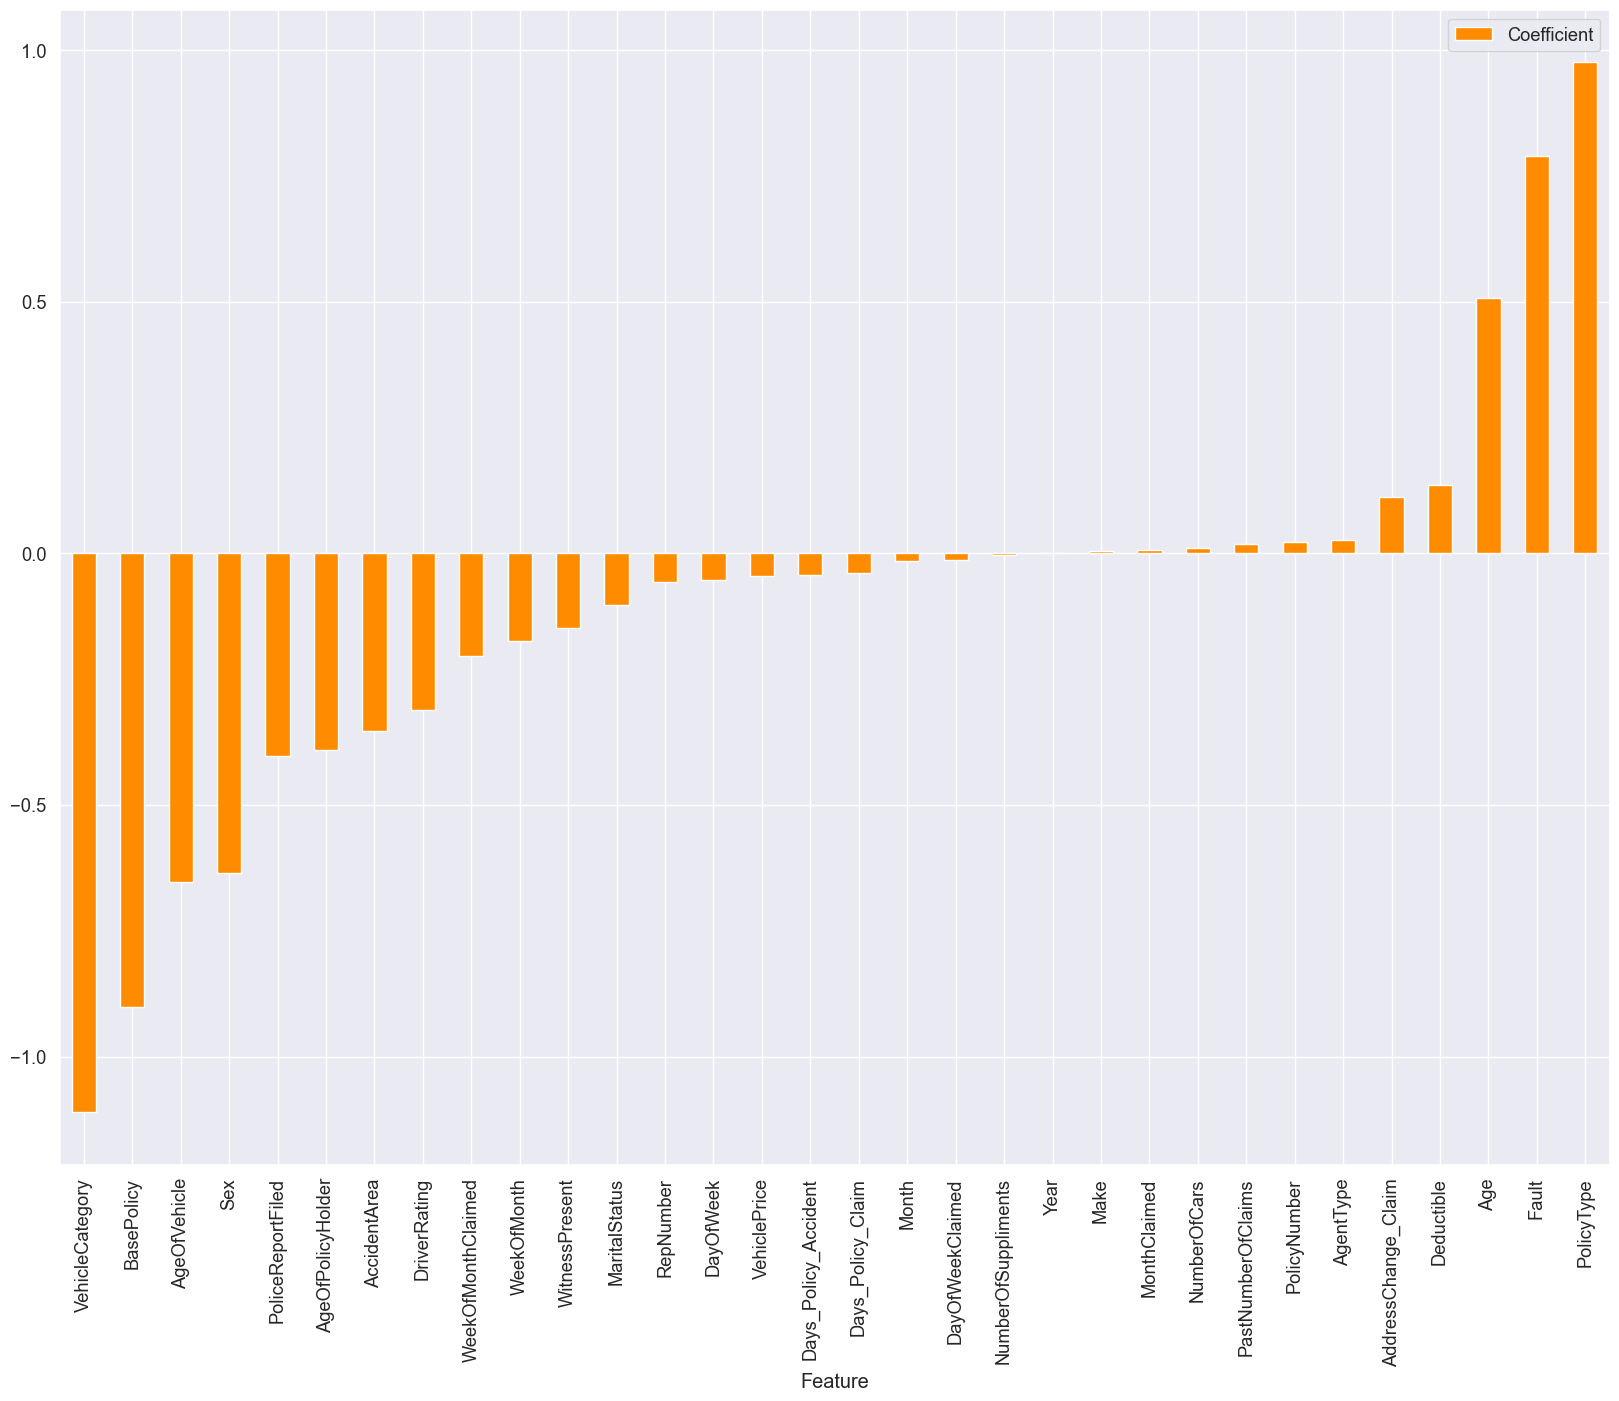

In [64]:
# Accessing the LogisticRegression estimator from the Pipeline
best_LogR_estimator = best_LogR.named_steps['logR']

# Creating the feature importance DataFrame
feature_importance_df = pd.DataFrame({"Feature": list(X_train.columns), "Coefficient": best_LogR_estimator.coef_[0]})

# Sorting and plotting the feature importances
feature_importance_df.sort_values("Coefficient").plot.bar(x='Feature', y='Coefficient', color='darkorange', figsize=(20, 15))

# Inference:

Positive Features:

Policy Type, Fault, and Age are the top features with positive coefficients. These features have the strongest influence in pushing the prediction towards the positive class (e.g., the model predicting the occurrence of an event or a claim).
Insight: For instance, the PolicyType and Fault features may reflect important factors related to the likelihood of claims, which could suggest higher chances of the positive class (e.g., fraud, high-risk claims).
Negative Features:

On the opposite end, Vehicle Category, Base Policy, and Age of Vehicle have large negative coefficients, meaning they are highly influential in reducing the probability of the target being positive.
Insight: The negative coefficient for VehicleCategory and BasePolicy suggests that specific categories of vehicles or older policies might be associated with lower chances of a claim or a specific outcome. For example, certain vehicle types could have a lower risk of accidents or insurance claims.
Magnitude of Feature Impact:

The magnitude of the coefficient (how far from zero) reflects the strength of each feature's impact. Large positive or negative coefficients indicate more significant influence, while smaller coefficients close to zero (like Month or PolicyNumber) have relatively minor effects on the model's predictions.
Insight: Features like Deductible, Claim Amount, and Age have more moderate positive impacts. They are important but not as dominant as PolicyType or Fault. On the other hand, PoliceReportFiled and Sex contribute more moderately to negative outcomes, indicating that their influence is weaker in determining a negative class.

Overall Importance:

Positive features (like PolicyType and Fault) drive the model to predict the positive class more often. These are likely features that indicate higher risk or claim likelihood.
Negative features (like VehicleCategory and BasePolicy) help the model predict the negative class. These features might indicate lower risk or lesser chances of a claim.

# 9 Decision Tree Model Building

In [65]:
#DT Base Model Definition

In [65]:
from sklearn.tree import DecisionTreeClassifier

# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

# 9.1. DT Hyperparameter Tuning

In [66]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [23, 24, 25, 26, 27],
    'min_samples_split': [2, 3, 4, 5],  
    'min_samples_leaf': [1, 2, 3, 4], 
  
    
    # we want to optimize for class 1, we have included the class_weight parameter in our grid.
    # In the grid above, the weight for class 0 is always 1, while the weight for class 1 varies from 1 to 5.
    # This will help the model to focus more on class 1.
}

In [67]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [68]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 4, 'min_samples_split': 2}


# 9.2  DT Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9291
           1       0.99      0.97      0.98      9291

    accuracy                           0.98     18582
   macro avg       0.98      0.98      0.98     18582
weighted avg       0.98      0.98      0.98     18582


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2323
           1       0.95      0.93      0.94      2323

    accuracy                           0.94      4646
   macro avg       0.94      0.94      0.94      4646
weighted avg       0.94      0.94      0.94      4646



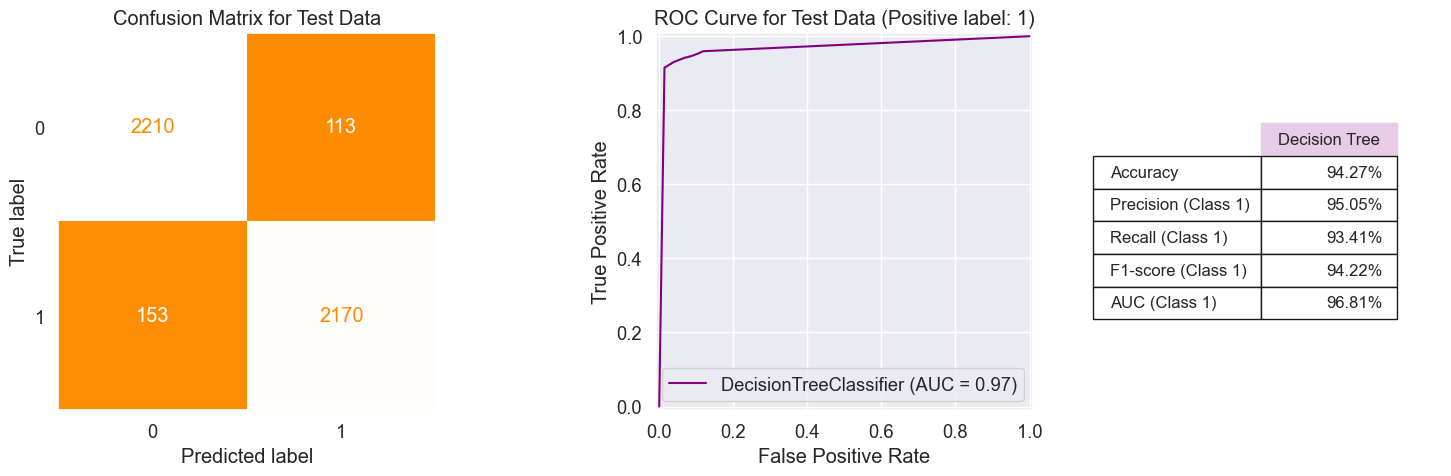

In [69]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')

In [70]:
# Save the final performance of DT classifier
dt_result = metrics_calculator(best_dt, X_test, y_test, 'Decision Tree')
dt_result

Decision Tree
Accuracy                   94.27%
Precision (Class 1)        95.05%
Recall (Class 1)           93.41%
F1-score (Class 1)         94.22%
AUC (Class 1)              96.81%

# 9.3 Feature Importance

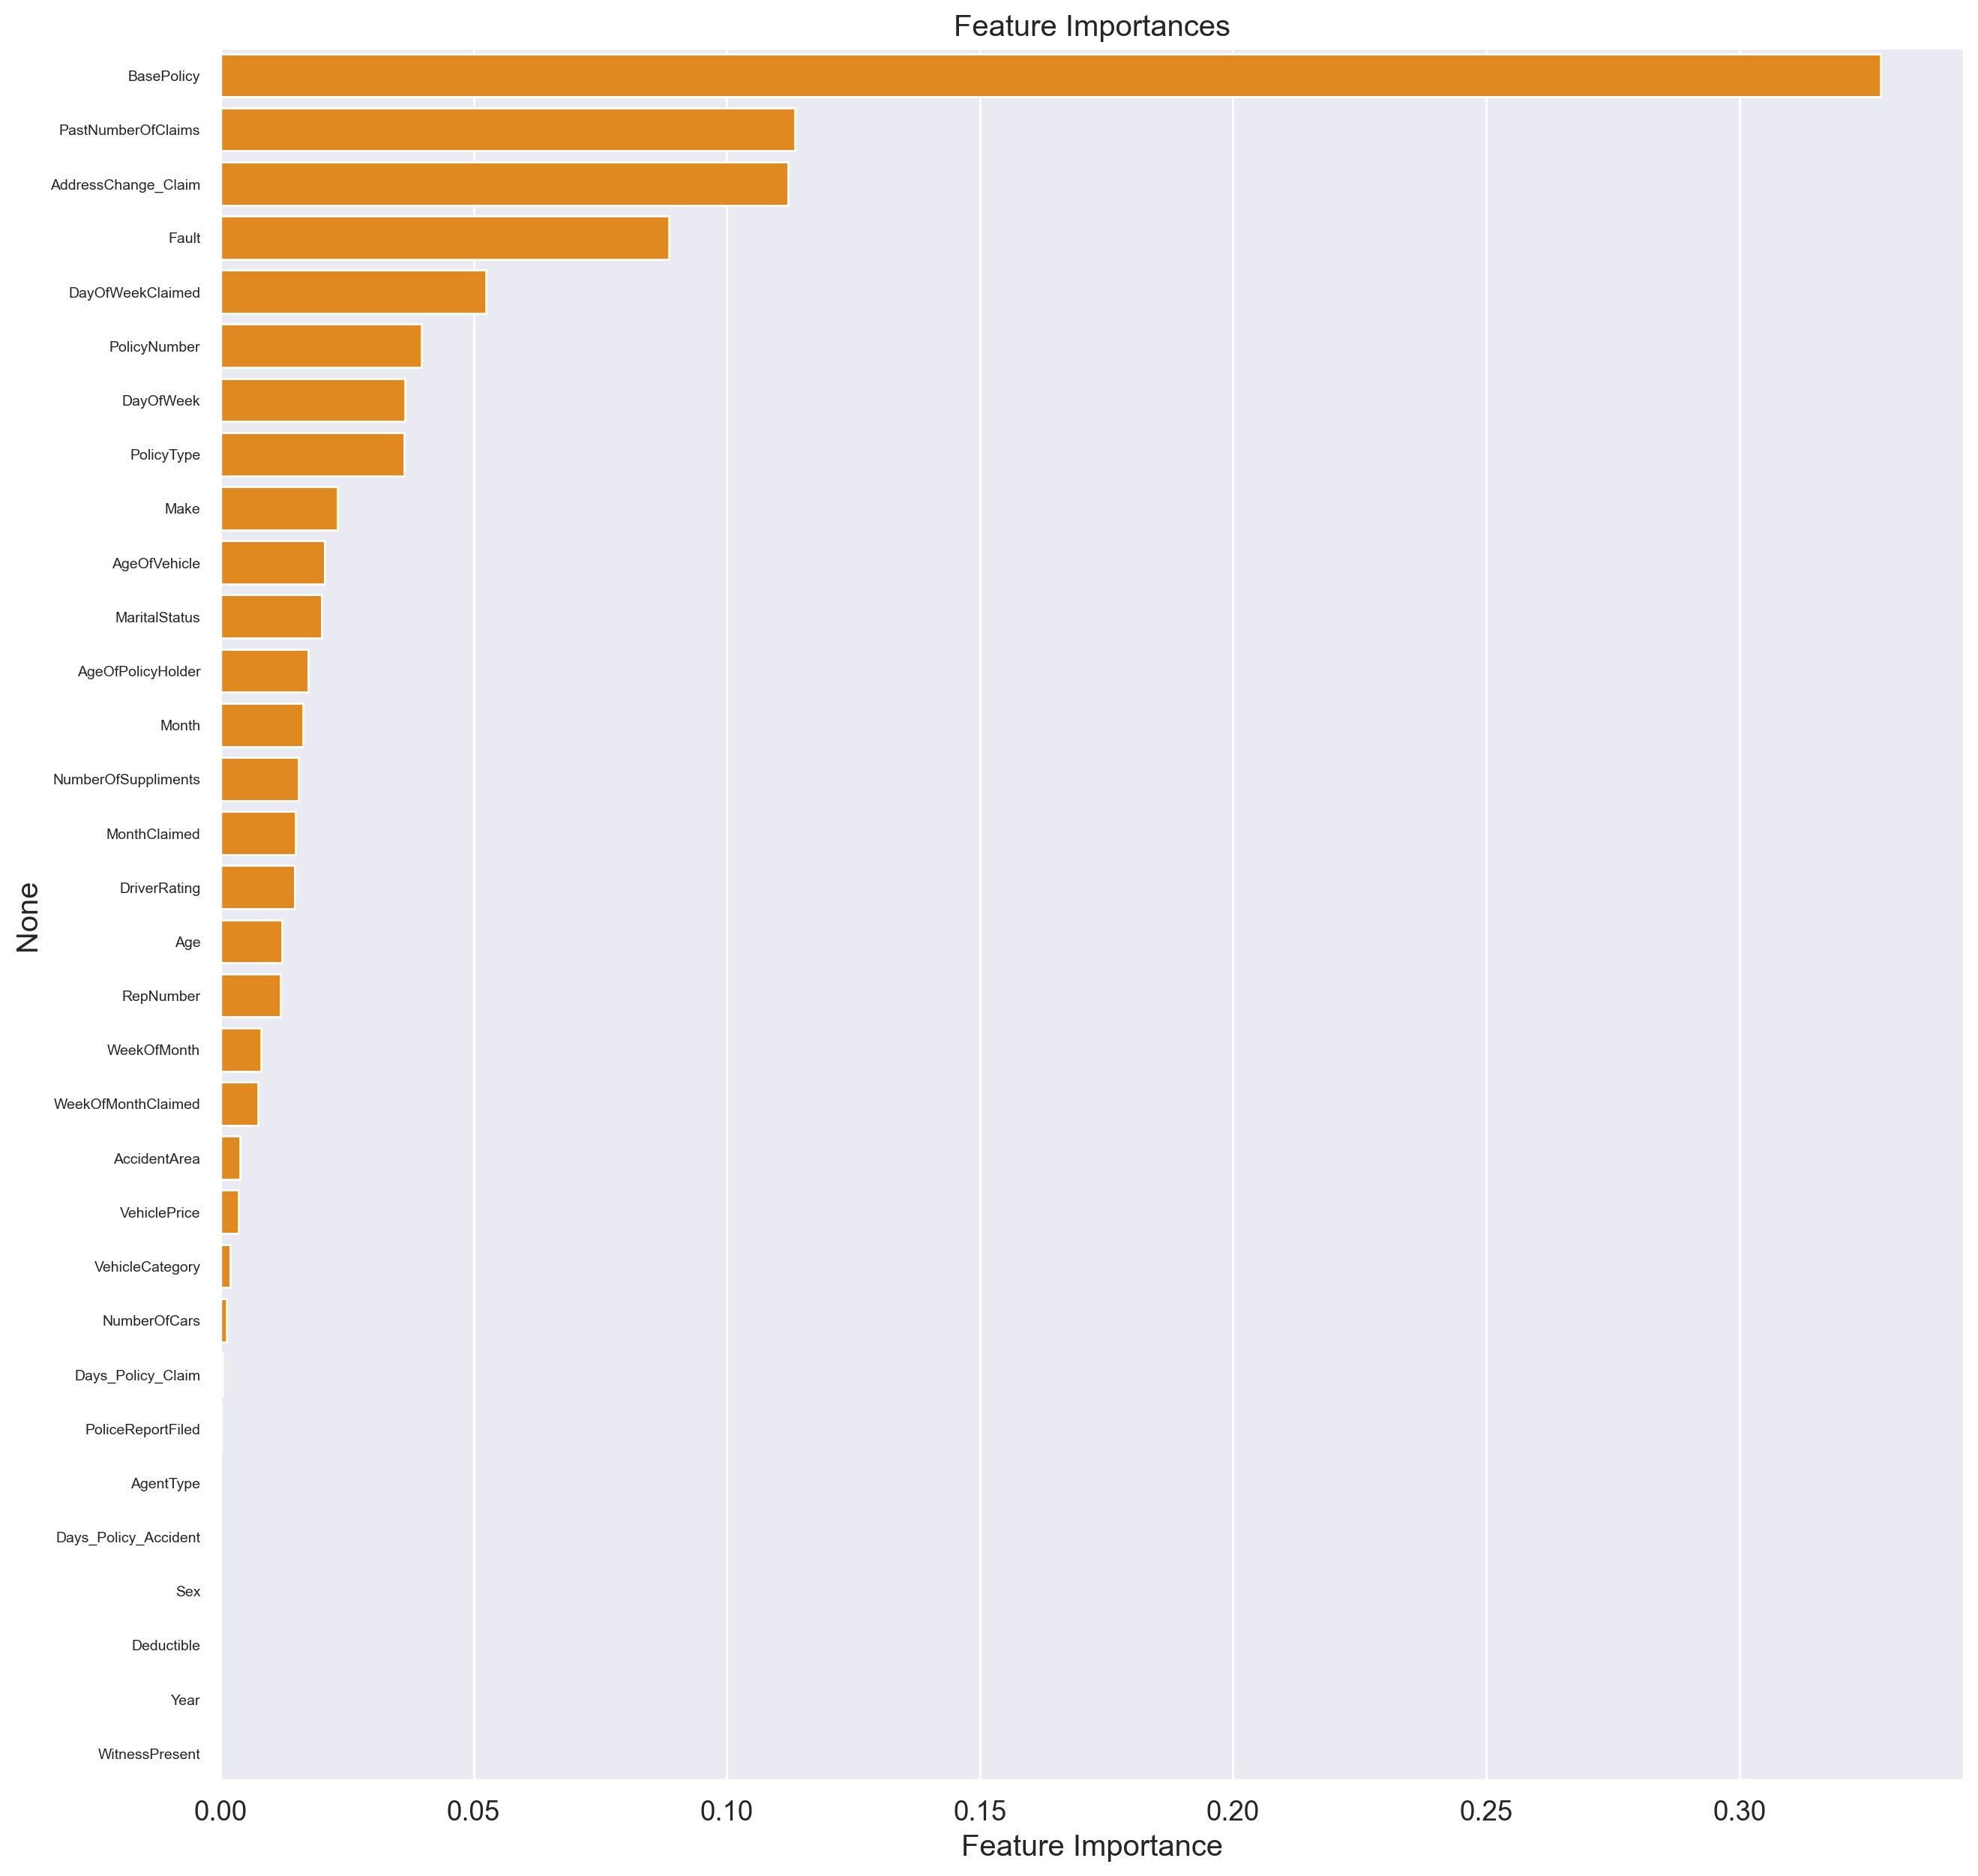

In [71]:
# Compute feature importances
feature_importances = best_dt.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(15, 15), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='darkorange')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

# 9. Random Forest Model Building

# 9.1 RF Model Definition

In [72]:
from sklearn.ensemble import RandomForestClassifier

# Define the base RF model
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)

# 9.2 RF Hyperparameter Tuning

In [73]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [3, 4, 5],
    'bootstrap': [True, False]
}

In [ ]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

# 9.3 RF Model Evaluation

In [ ]:
model_evaluation(best_rf, X_train, X_test, y_train, y_test, 'Random Forest')

In [76]:
# Save the final performance of RF classifier
rf_result = metrics_calculator(best_rf, X_test, y_test, 'Random Forest')
rf_result

Random Forest
Accuracy                    88.7%
Precision (Class 1)        84.63%
Recall (Class 1)           94.58%
F1-score (Class 1)         89.33%
AUC (Class 1)              96.16%

# 9.4 Feature Importance

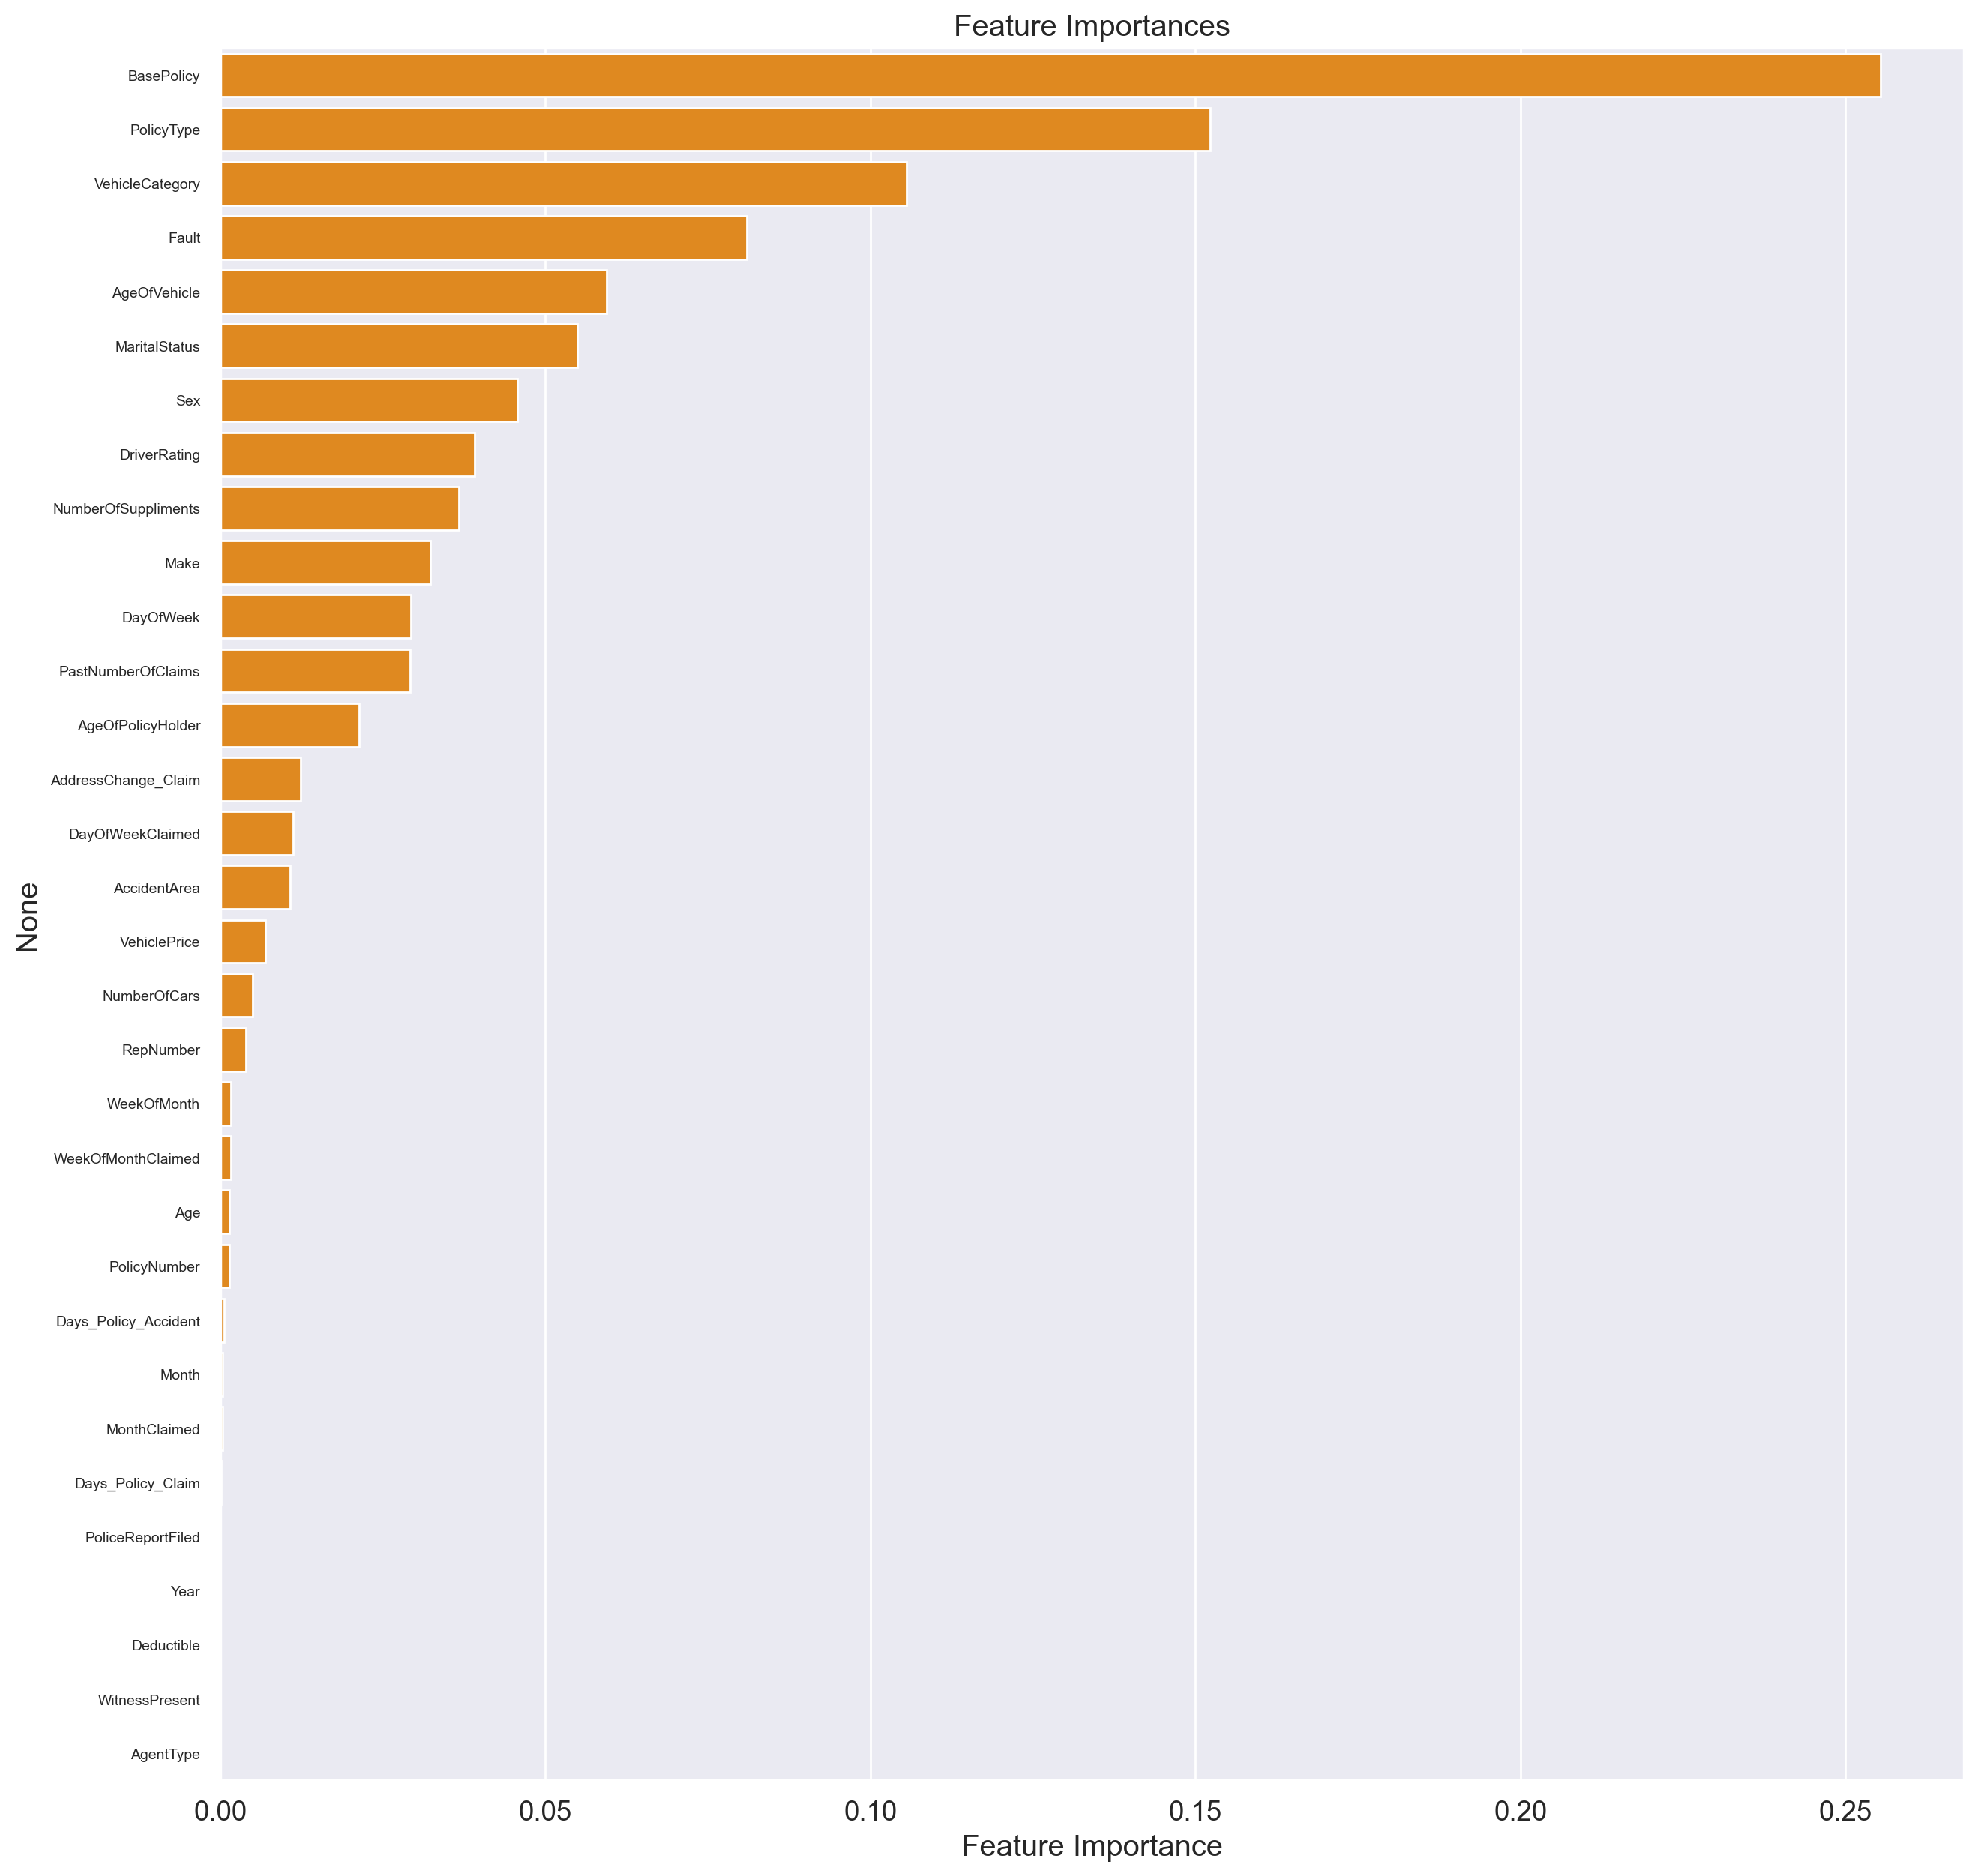

In [88]:
# Compute feature importances
feature_importances = best_rf.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(15, 15), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='darkorange')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

# 10. XGBoost Model Building

# 10.1 XGBoost Base Model Definition

In [99]:
# Define the model
from xgboost import XGBClassifier
# Define the model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)


# 10.2 XGBoost Hyperparameter Tuning

In [101]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_opt = XGBClassifier(max_depth=6,
                        learning_rate=0.05,
                        n_estimators=200,  
                        min_child_weight=2,
                        scale_pos_weight=0.5,
                        subsample=0.9 ,
                        colsample_bytree=0.5,
                        colsample_bylevel=0.8 ,
                        reg_alpha=0.05 ,
                        reg_lambda=0.1 ,
                        max_delta_step=2 ,
                        gamma=0.1,
                        random_state=0)

# Train the XGBoost classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=2, max_depth=6, max_leaves=0, min_child_weight=2,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.05, reg_lambda=0.1, ...)

# 10.3 XGBoost Model Evaluation


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9291
           1       1.00      0.94      0.97      9291

    accuracy                           0.97     18582
   macro avg       0.97      0.97      0.97     18582
weighted avg       0.97      0.97      0.97     18582


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2323
           1       1.00      0.94      0.97      2323

    accuracy                           0.97      4646
   macro avg       0.97      0.97      0.97      4646
weighted avg       0.97      0.97      0.97      4646



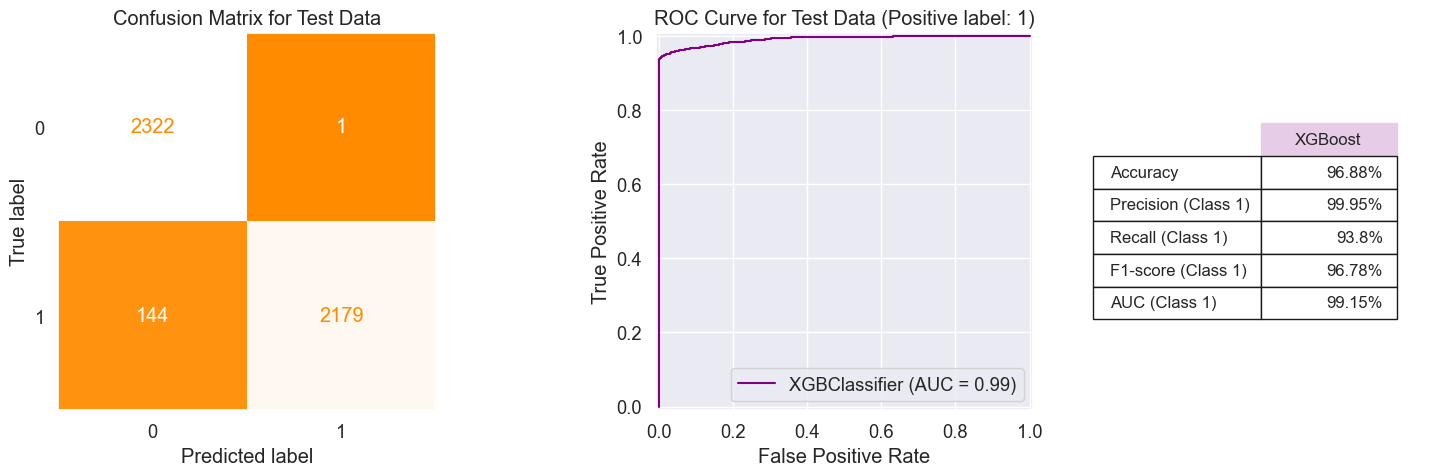

In [104]:
model_evaluation(xgb_opt, X_train, X_test, y_train, y_test, 'XGBoost')

Confusion Matrix:

The model correctly predicts 2322 true negatives (class 0) and 2179 true positives (class 1). It only makes 1 false positive and 144 false negatives, showing very low misclassification rates.
ROC Curve & AUC Score:

The AUC of 0.99 indicates excellent model performance in distinguishing between the two classes. The model almost perfectly separates positive and negative classes.
Performance Metrics:

Accuracy: 96.88% reflects highly accurate predictions overall.
Precision (Class 1): 99.95%, meaning the model is almost perfect when predicting the positive class.
Recall (Class 1): 93.8%, indicating a few false negatives, but overall recall is very strong.
F1-Score: 96.78%, showing a good balance between precision and recall.
This XGBoost model is highly effective, with outstanding precision and a strong AUC, suitable for high-stakes scenarios like fraud detection or medical diagnoses where minimizing false positives is crucial.

In [105]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(xgb_opt, X_test, y_test, 'XGBoost')
xgb_result

XGBoost
Accuracy             96.88%
Precision (Class 1)  99.95%
Recall (Class 1)      93.8%
F1-score (Class 1)   96.78%
AUC (Class 1)        99.15%

In [107]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([LogR_result, dt_result, rf_result,xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score (class 1) values
results.sort_values(by='F1-score (Class 1)', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: orange', subset='F1-score (Class 1)')

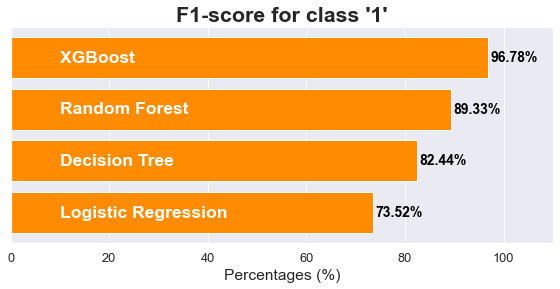

In [108]:
# Prepare values
results.sort_values(by='F1-score (Class 1)', ascending=True, inplace=True)
f1_scores = results['F1-score (Class 1)'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 4), dpi=70)
ax.barh(results.index, f1_scores, color='darkorange')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='black')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("F1-score for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

# 11. Load the new data

In [27]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier  # Assuming you have imported XGBClassifier

# Load your new data
new_data = pd.read_csv(r'C:\Users\Menka\Downloads\prediction_fraud_oracle.csv')

# Keep the original columns for reference (PolicyNumber, RepNumber)
Policy_Number = new_data['PolicyNumber']
Rep_Number = new_data['RepNumber']

# Drop columns not needed for prediction
new_data = new_data.drop(['FraudFound_P', 'PolicyNumber', 'RepNumber', 'Year'], axis=1)

# List of columns that need to be binary encoded
cols = ['AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']
Aval = ['Urban', 'Female', 'Policy Holder', 'Yes', 'Yes', 'External']
Bval = ['Rural', 'Male', 'Third Party', 'No', 'No', 'Internal']

# Apply binary encoding for each column
for i in range(len(cols)):
    if cols[i] in new_data.columns:
        new_data[cols[i]] = new_data[cols[i]].apply(lambda x: 1 if x in Aval else 0)

# Convert all columns to numeric, ensure that non-numeric columns are handled
new_data = new_data.apply(pd.to_numeric, errors='coerce')  # This converts non-numeric to NaN

# Ensure no NaN values remain
new_data = new_data.fillna(0)  # Replace NaN with 0, or handle as appropriate

# Make sure the column order matches the training data
# Example assuming X_train is the DataFrame used for training
new_data = new_data[X_train.columns]

# Make predictions using the best model
new_preds = best_model.predict(new_data)

# Add predictions and save the results
original_data = pd.read_csv(r'C:\Users\Menka\Downloads\prediction_fraud_oracle.csv')
original_data['fraud_found_prediction'] = new_preds
original_data.to_csv('new_data_with_predictions.csv', index=False)

print("Predictions saved to 'new_data_with_predictions.csv'")


Predictions saved to 'new_data_with_predictions.csv'


# 12. Conclusion:
Based on the performance metrics, XGBoost is the most effective model compared to Random Forest, Decision Tree, and Logistic Regression. Here's why:

Highest Accuracy (96.88%): XGBoost has the highest accuracy, meaning it makes the fewest overall prediction errors.
Outstanding Precision (99.95%): The precision for the positive class is nearly perfect, indicating that XGBoost is highly reliable when predicting positive instances, which is critical in scenarios where false positives can have significant consequences (e.g., fraud detection, medical diagnoses).
Balanced F1-Score (96.78%): The high F1-score shows that XGBoost maintains a good balance between precision and recall, outperforming the other models.
Excellent AUC (99.15%): With an AUC close to 1, XGBoost demonstrates superior ability to distinguish between the positive and negative classes, making it ideal for decision-making in high-stakes contexts.
Good Recall (93.8%): Despite focusing on precision, the recall is also strong, meaning the model successfully captures a significant portion of actual positive instances, making it highly dependable in complex scenarios.
# Next Steps:
Deploying XGBoost on New Dataset: After choosing XGBoost, you can confidently apply this model to new datasets. This will ensure optimal performance based on the proven metrics.

Visualizing with Power BI: I used Power BI to visualize the entire dataset based on fraud and non-fraud classifications. The use of interactive visualizations offers a clear, data-driven view of the fraud detection process. By leveraging Power BI's interactive filtering, the insights can be explored dynamically, aiding stakeholders in making well-informed decisions.

Final Recommendation:
XGBoost is the best model for this classification problem, with exceptional performance across all key metrics. It's suitable for applications where both accuracy and precision are critical. By visualizing this in Power BI, stakeholders can better understand the model’s strength and reliability, facilitating informed decision-making.